# Angela Stahl

   ## CSC 593 - Programming for Scientists, Fall 2019
   
   ## Final Project

## **Background**

All of the data that will be used for this final project was obtained from the University of Rhode Island Graduate School of Oceanography's Phytoplankton Assisstant, Jessica Carney. A section of this data is available online (up until 2017) at https://web.uri.edu/gso/research/plankton/data/. However, the dataset I obtained from Jess continues until 2019. I chose to use the more updated dataset and the files have been uploaded under my Juptyter "AStahl Dataset" notebook and have also been emailed. 

Each week the phytoplankton assisstant goes to Fox Island (41 34.2°N, 71 23.4°W)—just off the end of Rome Point, Narragansett RI—to collect the following data:

**1) To collect physical water properties:**

A YSI—an electronic instrument that collects water temperature, salinity, pH, and dissolved oxygen levels—is lowered into the water. Measures are taken for surface and bottom measurements.

**2) To collect chlorophyll properties:**

Surface water and bottom water are collected separately using a niskin bottle—a plastic cylinder with stoppers at each end in order to seal the bottle completely—and are kept on ice (only a few hours) until it is able to be analyzed on shore. A subsample is taken from each bottle and chlorophyll is measured using relative flourescence units on a fluorometer.

**3) To collect nutrient properties:**

A subsample of water from each niskin bottle is filtered and placed into a Lachat Instruments Quik Chem 8000 Flow Injection Analyzer to obtain nutrient levels. 

**4) To collect phytoplankton data:**

A 20µm net with a cod end—a tapered net that is end capped with a jar—is lowered into the water and pulled through the water for 5 minutes. After hawling the net back onto the boat, it it rinsed with a low-pressure hose to ensure all the phytoplankton are in the jar. The jar is then sealed and stored for later analysis. Once on shore, phytoplankton cells are enumerated under a compound microscope using a Sedgewick-Rafter counting chamber. Samples are counted live and unconcentrated.

This data is part of The Narragansett Bay Long-Term Plankton Time Series. This data has been collected every week starting in 1959 providing a high-resolution dataset of phytoplankton community changes in Narragansett Bay over time. Data is publicly available as early as 1999.

For all of these files, the location parameter is largely consisent so I chose to ignore that variable for this project.
I chose to keep the date from each file to be able to merge the files. 
In addition, for all of these variables in the following code, I chose to use surface values because phytoplankton often reside in the surface meters of the water column instead of at depth. They do this to be able to obtain maximum light absorption as they are primary producers. 

## **Data Processing**
There were four different files that contain my data:

#### **1) Temperature Data**

The 'PhysicalData_9.23.2019 .csv' file contains the date, location, time, and several different seawater parameters. For this project, I want to look at effects of temperature on phytoplankton. I chose to use the date and surface temperature columns.

In addition, I had to do a lot of data cleaning. Please see comments within the code for data cleaning. 

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

%matplotlib inline
sns.set()

In [2]:
######loading my environmental data

###set the first line in the file as column names
banner4=pd.read_csv('../AStahl Dataset/PhysicalData_9.23.2019 .csv', nrows=5, encoding='latin')
colnames4 = list(banner4.columns)

###read in dataset with the column names that was just made
#it was giving me a weird error and therefore included the encoding 'latin'
environ_data=pd.read_csv('../AStahl Dataset/PhysicalData_9.23.2019 .csv', encoding='latin', 
                         names=colnames4, skiprows=2)

#I want date and surface temp columns
###only pulling the columns I want to use 
environ_data=environ_data.iloc[:,[3,6]]

#rename columns to make analysis easier
environ_data.rename(columns={'Surface Temp':'temp'}, inplace=True)

###fixing the date format to datetime64 so it will be consistent when I merge the datasets
environ_data['Date'] =  pd.to_datetime(environ_data['Date'], format='%d-%b-%y')
environ_data.head()

#environ_data.info()

,Date,temp
0,1999-01-25,0.00
1,1999-02-01,2.25
2,1999-02-08,0.00
3,1999-02-15,0.00
4,1999-02-22,0.00


#### **2) Chlorophyll Data**

The 'chldata_9.23.2019.csv' file contains the date, location, chlorophyll values in several different size classes, total chlorophyll, and pheophytin levels. In addition, these parameters are broken up into "frozen values" and "adjusted values to approximate immediate extraction". When the series started in 1959, samples were collected, frozen, and then thawed for analysis. This had some effect on the chlorophyll values. The freezing of samples stopped in July of 2008 and immediate analysis started. As a result, the previous frozen values were adjusted to account for effect of freezing. 
I chose to use the date and:

   a) the surface "total chlorophyll" size class which contains all the chlorophyll contained in the sample (vs. only certain sizes) as it is hard to accurately distinguish which phytoplankton species are producing which chlorophyll size class without direct measurments

   b) the "adjusted values to approximate immediate extraction" column as it provided 11 more years of data vs. the "frozen values" column
   
Again, data cleaning is within code as comments. 

In [3]:
######loading my chlorophyll data 

###set the first line in the file as column names
banner5=pd.read_csv('../AStahl Dataset/chldata_9.23.2019.csv')
colnames5 = list(banner5.columns)

###read in dataset with the column names that was just made
chl_data=pd.read_csv('../AStahl Dataset/chldata_9.23.2019.csv', 
                     names=colnames5,skiprows=3)

#in the last few columns, there are notes written about some of the data
#I do not need this information for this project and chose to remove it
###remove the last unwated 'notes' columns
chl_data=chl_data.iloc[:,:-22]

#I am looking to use the date and total surface chlorophyll data
###only pulling the columns I want to use
chl_data=chl_data.iloc[:,[12,13]]

###Rename columns to make analysis easier
chl_data.rename(columns={'Sample Date.1':'Date',
                         'surface chla all':'Chla'}, inplace=True)

# for some reason there is a row that just states "data missing"
###I chose to remove it
chl_data=chl_data[chl_data.Date!='*data missing']

###fixing the date format to datetime64 so it will be consistent when I merge the datasets
chl_data['Date'] =  pd.to_datetime(chl_data['Date'], format='%d-%b-%y')

#changing nds to NaNs to be able to convert to float
chl_data['Chla']=chl_data['Chla'].replace('nd', 'NaN')

#changing to float for alter analysis
chl_data['Chla']=chl_data['Chla'].astype('float')

chl_data.head()

#chl_data.info()

,Date,Chla
0,1999-01-25,3.72
1,1999-02-01,2.90
2,1999-02-08,2.20
3,1999-02-15,1.34
4,1999-02-22,12.56


#### **3) Silica and Nitrogen Data**

The 'nutrientdata.xls' file contains nitrogen data on one excel sheet and silica data on another excel sheet. For this project, I chose to use the date and surface nitrogen and silica values. In addition, nitrogen is broken up into 5 different forms of nitrogen (NH4, NO3+2, NO3, NO2, and DIN). I chose to group the first four constituents into an organic nitrogen group and the last constituent as inorganic nitrogen. 

Again, data cleaning is within code as comments. 

In [4]:
######loading my silica data

###set the first line in the file as column names
banner6=pd.read_excel('../AStahl Dataset/nutrientdata.xls',sheet_name=1)
colnames6=list(banner6.columns)

###read in dataset with the column names that was just made
Si_data=pd.read_excel('../AStahl Dataset/nutrientdata.xls',sheet_name=1, names=colnames6,
                     skiprows=2)

###Rename columns to make analysis easier
Si_data.rename(columns={'DATE':'Date'}, inplace=True)

#I am looking for date and surface silica data
###remove unwanted columns by keeping the columns you want 
Si_data=Si_data.iloc[:,[1,3]]

###fixing the date format to datetime64 so it will be consistent when I merge the datasets 
Si_data['Date']=pd.to_datetime(Si_data['Date'], format='%Y-%m-%d')

#changing nds to NaNs to be able to convert to float
Si_data['Si']=Si_data['Si'].replace('nd', 'NaN')

#changing to float for later analysis 
Si_data['Si']=Si_data['Si'].astype('float')
Si_data.head()

#Si_data.info()

,Date,Si
0,2003-02-24,0.134507
1,2003-03-10,0.779352
2,2003-03-24,3.543829
3,2003-04-09,2.670297
4,2003-04-23,1.200828


In [5]:
######loading my nitrogen data

###set the fifth line in the file as column names
banner7=pd.read_excel('../AStahl Dataset/nutrientdata.xls',sheet_name=0, header=4)
colnames7=list(banner7.columns)

###read in dataset with the column names that was just made
NandP_data=pd.read_excel('../AStahl Dataset/nutrientdata.xls',sheet_name=0, names=colnames7,
                         skiprows=6)

###Rename columns to make analysis easier
NandP_data.rename(columns={'Unnamed: 0':'Date','NO3+2':'NO32'}, inplace=True)


#I am looking for the date and surface nitrogen and phosphate values
###remove unwanted columns by keeping the columns you want 
NandP_data=NandP_data.iloc[:,[0,2,4,5,6,7]]

###fixing the date format to datetime64 so it will be consistent when I merge the datasets
NandP_data['Date']=pd.to_datetime(NandP_data['Date'], format='%Y-%m-%d')

#changing nds to NaNs to be able to convert to float
NandP_data['NH4']=NandP_data['NH4'].replace('nd', 'NaN')
NandP_data['NO32']=NandP_data['NO32'].replace('nd', 'NaN')
NandP_data['NO3']=NandP_data['NO3'].replace('nd', 'NaN')
NandP_data['NO2']=NandP_data['NO2'].replace('nd', 'NaN')

#converting nitrogen columns to float for later analysis
NandP_data['NH4']=NandP_data['NH4'].astype('float')
NandP_data['NO32']=NandP_data['NO32'].astype('float')
NandP_data['NO3']=NandP_data['NO3'].astype('float')
NandP_data['NO2']=NandP_data['NO2'].astype('float')

#combing all the organic nitrogen into one column
NandP_data['OrgN']=NandP_data['NH4']+NandP_data['NO32']+NandP_data['NO3']+NandP_data['NO2']

#removing the previous nitrogen columns
NandP_data=NandP_data.iloc[:,[0,5,6]]
NandP_data.head()

#NandP_data.info()

,Date,DIN,OrgN
0,2003-05-05,3.488308,5.798543
1,2003-05-21,0.350170,0.459097
2,2003-05-28,6.121488,8.390960
3,2003-06-04,1.928109,3.309843
4,2003-06-09,3.047557,5.342963


#### **4) Phytoplankton Count Data**

The 'countdata_9.23.2019 .xls' file (very large file so code may take longer than normal) contains the date, location, phytoplankton total abundance and phytoplankton counts for each species (about 250 species). I chose to use the date and:

   a) total phytoplankton abundance
   
   b) 2 species that largely contribute to harmful algal blooms (HABs): *Akashiwo sanguineum* and *Pseudo-
nitzschia*. HABs species are often toxic to the environment in large quantities. In addition, they can be hazardous to fish and other marine life if present in large enough amounts. One hypothesis is the HAB events will increase as temperatures within the Bay increase.
   
   c) 1 species that is vitally important to the winter-spring bloom—large phytoplankton bloom that provides food for the large amount of fish returning to the bay after the cold winter—that has since been declining in recent years: *Thalassiosira nordenskioeldii*.

Again, data cleaning is within code as comments. 

In [6]:
#####loading my count data

###set the first line in the file as column names
banner8=pd.read_excel('../AStahl Dataset/countdata_9.23.2019 .xls',sheet_name=1)
colnames8=list(banner8.columns)

###read in dataset with the column names that was just made
count_data=pd.read_excel('../AStahl Dataset/countdata_9.23.2019 .xls',sheet_name=1, 
                         names=colnames8, skiprows=1)

###Rename columns to make analysis easier
count_data.rename(columns={'DATE':'Date','COUNT TYPE':'count_type','Total abundance':'total_abund',
                           'Akashiwo sanguineum':'A_sang',
                           'Pseudo-nitzschia fraudulenta':'Pseudonitzschia_fraudulenta',
                           'Pseudonitzschia pseudodelicatissima':'Pseudonitzschia_pseudodelicatissima',
                           'Pseudonitzschia pungens':'Pseudonitzschia_pungens',
                           'Pseudo-nitzschia spp.':'Pseudonitzschia_uncl.',
                           'Pseudo-nitzschia turgidula cf':'Pseudonitzschia_turgidula_cf',
                           'Skeletonema spp.':'Skeletonema','Thalassiosira nordenskioeldii':'T_norden',
                           'Thalassiosira rotula':'T_rot'}, inplace=True)

#in the COUNT TYPE section there are several different types:
    #surface, bottom, or mixed for each date where data was gathered
#I am only looking for the surface values and if surface values is not available then I am looking for mixed
#filtering for the surface and mixed values
surface_values=['S/R Cell mixed', 'S/R Surface', 'S/R surface']
surf_count_data=count_data[count_data.count_type.isin(surface_values)]

#I am looking for the date and the species that are mentioned above
##remove unwanted columns by keeping the columns you want 
surf_count_data=surf_count_data[['Date','total_abund','A_sang','Pseudonitzschia_fraudulenta',
                                'Pseudonitzschia_pseudodelicatissima','Pseudonitzschia_pungens','Pseudonitzschia_uncl.',
                                'Pseudonitzschia_turgidula_cf','T_norden']]

###fixing the date format to datetime64 so it will be consistent when I go to merge the dataset
surf_count_data['Date']= pd.to_datetime(surf_count_data['Date'],errors='coerce', format='%Y-%m-%d')
surf_count_data.head()

,Date,total_abund,A_sang,Pseudonitzschia_fraudulenta,Pseudonitzschia_pseudodelicatissima,Pseudonitzschia_pungens,Pseudonitzschia_uncl.,Pseudonitzschia_turgidula_cf,T_norden
0,1999-01-25,124000.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,1999-02-01,113000.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2,1999-02-08,107000.0,0.0,0,0.0,0.0,0.0,0.0,0.0
3,1999-02-15,95500.0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,1999-02-22,163500.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [7]:
#There are several different species of Pseudonitzschia, which are all HAB forming. 
#As a result, I want to combine them into one column
surf_count_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 0 to 1579
Data columns (total 9 columns):
Date                                   1020 non-null datetime64[ns]
total_abund                            1019 non-null float64
A_sang                                 1021 non-null float64
Pseudonitzschia_fraudulenta            1021 non-null object
Pseudonitzschia_pseudodelicatissima    1021 non-null float64
Pseudonitzschia_pungens                1021 non-null float64
Pseudonitzschia_uncl.                  1018 non-null float64
Pseudonitzschia_turgidula_cf           1021 non-null float64
T_norden                               1021 non-null float64
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 79.8+ KB


In [8]:
#for some reason the fraudulenta is an object and I want it to be a float64 to combine with the other columns
###changing Pseudonitzschia fraudulenta column to float
surf_count_data['Pseudonitzschia_fraudulenta']=surf_count_data.Pseudonitzschia_fraudulenta.astype(float)
surf_count_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 0 to 1579
Data columns (total 9 columns):
Date                                   1020 non-null datetime64[ns]
total_abund                            1019 non-null float64
A_sang                                 1021 non-null float64
Pseudonitzschia_fraudulenta            993 non-null float64
Pseudonitzschia_pseudodelicatissima    1021 non-null float64
Pseudonitzschia_pungens                1021 non-null float64
Pseudonitzschia_uncl.                  1018 non-null float64
Pseudonitzschia_turgidula_cf           1021 non-null float64
T_norden                               1021 non-null float64
dtypes: datetime64[ns](1), float64(8)
memory usage: 79.8 KB


In [9]:
###combining pseudonitzschia columns
surf_count_data['Pseudo']=surf_count_data['Pseudonitzschia_fraudulenta']
+surf_count_data['Pseudonitzschia_pseudodelicatissima']+surf_count_data['Pseudonitzschia_pungens']
+surf_count_data['Pseudonitzschia_uncl.']+surf_count_data['Pseudonitzschia_turgidula_cf']
#removing the previous pseudonitzschia columns
surf_count_data=surf_count_data.iloc[:,[0,1,2,8,9]]
surf_count_data.head()

,Date,total_abund,A_sang,T_norden,Pseudo
0,1999-01-25,124000.0,0.0,0.0,0.0
1,1999-02-01,113000.0,0.0,0.0,0.0
2,1999-02-08,107000.0,0.0,0.0,0.0
3,1999-02-15,95500.0,0.0,0.0,0.0
4,1999-02-22,163500.0,0.0,0.0,0.0


Now that all the datasets only have the data I need and a consistent time column, I want to merge them all into one file. I was having problems when I tried to merge them all at once so I broke it into several steps to be able to trouleshoot between merges.

In [10]:
#merging some above datasets
data1=pd.merge(environ_data, chl_data, on=['Date'], how='outer')

#Putting all of the dates in chronological order
data1.sort_values('Date', inplace=True)

#merging more datasets
data2=pd.merge(Si_data, NandP_data, on=['Date'], how='outer')

#Putting all of the dates in chronological order
data2.sort_values('Date', inplace=True)

#merging the first 4 datasets
data3=pd.merge(data1,data2, on=['Date'], how='outer')

#Putting all of the dates in chronological order
data3.sort_values('Date', inplace=True)

#final merge of all datasets
data=pd.merge(data3,surf_count_data, on=['Date'], how='outer')

#Putting all of the dates in chronological order
data.sort_values('Date', inplace=True)
data.head()

,Date,temp,Chla,Si,DIN,OrgN,total_abund,A_sang,T_norden,Pseudo
0,1999-01-25,0.00,3.72,NaN,NaN,NaN,124000.0,0.0,0.0,0.0
1,1999-02-01,2.25,2.90,NaN,NaN,NaN,113000.0,0.0,0.0,0.0
2,1999-02-08,0.00,2.20,NaN,NaN,NaN,107000.0,0.0,0.0,0.0
3,1999-02-15,0.00,1.34,NaN,NaN,NaN,95500.0,0.0,0.0,0.0
4,1999-02-22,0.00,12.56,NaN,NaN,NaN,163500.0,0.0,0.0,0.0


I am not looking to fill in any data so I don't want to use the fillna function.If I am looking to compare changes over time, I need all the values for all of the variables. Therefore, I think the best way to be able to collect all that data is to remove the entire row. Also, since I have many random NAs, I do not think that the data.dropna() will give me enough resolution for the test I want to do.

In [11]:
#removing columns where there is NO data
data.dropna(how='all')
    
#removing duplicates
data.drop_duplicates()

,Date,temp,Chla,Si,DIN,OrgN,total_abund,A_sang,T_norden,Pseudo
0,1999-01-25,0.00,3.72,NaN,NaN,NaN,124000.0,0.0,0.0,0.0
1,1999-02-01,2.25,2.90,NaN,NaN,NaN,113000.0,0.0,0.0,0.0
2,1999-02-08,0.00,2.20,NaN,NaN,NaN,107000.0,0.0,0.0,0.0
3,1999-02-15,0.00,1.34,NaN,NaN,NaN,95500.0,0.0,0.0,0.0
4,1999-02-22,0.00,12.56,NaN,NaN,NaN,163500.0,0.0,0.0,0.0
5,1999-03-01,0.00,2.27,NaN,NaN,NaN,113000.0,0.0,0.0,0.0
6,1999-03-10,0.00,2.75,NaN,NaN,NaN,42500.0,0.0,0.0,0.0
7,1999-03-16,0.00,3.15,NaN,NaN,NaN,96500.0,0.0,0.0,0.0
8,1999-03-24,5.75,7.82,NaN,NaN,NaN,300500.0,0.0,0.0,0.0
9,1999-03-29,6.25,4.81,NaN,NaN,NaN,439000.0,0.0,0.0,0.0


In [12]:
#don't ask me why this has to be done but it is the ONLY way I could figure out to get rid of the last empty row
data.drop([1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,
           1168,1169,1170,1171,1172], inplace=True)
data

,Date,temp,Chla,Si,DIN,OrgN,total_abund,A_sang,T_norden,Pseudo
0,1999-01-25,0.00,3.72,NaN,NaN,NaN,124000.0,0.0,0.0,0.0
1,1999-02-01,2.25,2.90,NaN,NaN,NaN,113000.0,0.0,0.0,0.0
2,1999-02-08,0.00,2.20,NaN,NaN,NaN,107000.0,0.0,0.0,0.0
3,1999-02-15,0.00,1.34,NaN,NaN,NaN,95500.0,0.0,0.0,0.0
4,1999-02-22,0.00,12.56,NaN,NaN,NaN,163500.0,0.0,0.0,0.0
5,1999-03-01,0.00,2.27,NaN,NaN,NaN,113000.0,0.0,0.0,0.0
6,1999-03-10,0.00,2.75,NaN,NaN,NaN,42500.0,0.0,0.0,0.0
7,1999-03-16,0.00,3.15,NaN,NaN,NaN,96500.0,0.0,0.0,0.0
8,1999-03-24,5.75,7.82,NaN,NaN,NaN,300500.0,0.0,0.0,0.0
9,1999-03-29,6.25,4.81,NaN,NaN,NaN,439000.0,0.0,0.0,0.0


In [13]:
#Save file
data.to_csv('../AStahl Dataset/all_data.csv')

## **Analysis**

**There are three questions that I want to answer with the data above:**

1) Is average temperature or nutrients changing in the Bay over time?

2) Is total phytoplankton abundance changing over time?

3) Do any of the environmental factors have a significant impact on *Thalassiosira nordenskioeldii* abundance or the 2 HABs species: *Akashiwo sanguineum* or *Pseudonitzschia*? 

### Question 1) Is average temperature or nutrients changing in the Bay over time?

To answer this question I completed linear models.

In [14]:
#changing the time to jdate to be able to use in linear model
#the code used in class wasn't working with the data for some reason?
#so I used this format instead - it lists the year and then the day of the year (1-365)
data['jdate'] = data['Date'].dt.strftime('%Y%j')
#and changed it to a float
data['jdate'] = data.jdate.astype(float)
#rearrange order of columns
data = data[['Date', 'jdate', 'Chla','temp','Si','OrgN','DIN','total_abund',
             'A_sang','T_norden','Pseudo']]
data.head()

,Date,jdate,Chla,temp,Si,OrgN,DIN,total_abund,A_sang,T_norden,Pseudo
0,1999-01-25,1999025.0,3.72,0.00,NaN,NaN,NaN,124000.0,0.0,0.0,0.0
1,1999-02-01,1999032.0,2.90,2.25,NaN,NaN,NaN,113000.0,0.0,0.0,0.0
2,1999-02-08,1999039.0,2.20,0.00,NaN,NaN,NaN,107000.0,0.0,0.0,0.0
3,1999-02-15,1999046.0,1.34,0.00,NaN,NaN,NaN,95500.0,0.0,0.0,0.0
4,1999-02-22,1999053.0,12.56,0.00,NaN,NaN,NaN,163500.0,0.0,0.0,0.0


In [15]:
#creating a linear model to see if time has an effect on temperature
x = sm.add_constant(data.jdate)
y = data.temp
#I skipped over any of the values that were missing
lm_tempvtime =sm.OLS(y, x, missing='drop').fit()
lm_tempvtime.summary()

C:\Users\Angela S\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6145
Date:                Fri, 20 Dec 2019   Prob (F-statistic):              0.433
Time:                        15:49:35   Log-Likelihood:                -3404.3
No. Observations:                 985   AIC:                             6813.
Df Residuals:                     983   BIC:                             6822.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -50.5099     79.951     -0.632      0.528    -207.405     106.385
jdate        3.12e-05   3.98e-05      0.784      0.433   -4.69e-05       0.000
==============================================================================
Omnibus:                    14695.488   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.119
Skew:                           0.019   Prob(JB):                     4.00e-18
Kurtosis:                       1.603   Cond. No.                     6.57e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.57e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#creating a linear model to see if time has an effect on silica
x2 = sm.add_constant(data.jdate)
y2 = data.Si
#I skipped over any of the values that were missing
lm_sivtime =sm.OLS(y2, x2, missing='drop').fit()
lm_sivtime.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Si   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                  0.009693
Date:                Fri, 20 Dec 2019   Prob (F-statistic):              0.922
Time:                        15:49:35   Log-Likelihood:                -2170.8
No. Observations:                 548   AIC:                             4346.
Df Residuals:                     546   BIC:                             4354.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.9840    191.999      0.172      0.864    -344.163     410.131
jdate      -9.398e-06   9.55e-05     -0.098      0.922      -0.000       0.000
==============================================================================
Omnibus:                       92.670   Durbin-Watson:                   0.387
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.862
Skew:                           1.064   Prob(JB):                     7.80e-33
Kurtosis:                       4.395   Cond. No.                     7.10e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
#creating a linear model to see if time has an effect on organic nitrogen
x3 = sm.add_constant(data.jdate)
y3 = data.OrgN
#I skipped over any of the values that were missing
lm_OrgNvtime =sm.OLS(y3, x3, missing='drop').fit()
lm_OrgNvtime.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   OrgN   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     21.67
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           3.87e-06
Time:                        15:49:35   Log-Likelihood:                -2624.7
No. Observations:                 721   AIC:                             5253.
Df Residuals:                     719   BIC:                             5262.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        650.1434    138.139      4.706      0.000     378.940     921.347
jdate         -0.0003   6.87e-05     -4.655      0.000      -0.000      -0.000
==============================================================================
Omnibus:                      171.560   Durbin-Watson:                   0.382
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              308.289
Skew:                           1.453   Prob(JB):                     1.14e-67
Kurtosis:                       4.349   Cond. No.                     8.08e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.08e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#creating a linear model to see if time has an effect on dissolved inorganic nitrogen
x4 = sm.add_constant(data.jdate)
y4 = data.DIN
#I skipped over any of the values that were missing
lm_DINvtime =sm.OLS(y4, x4, missing='drop').fit()
lm_DINvtime.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DIN   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     21.54
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           4.10e-06
Time:                        15:49:35   Log-Likelihood:                -2311.4
No. Observations:                 742   AIC:                             4627.
Df Residuals:                     740   BIC:                             4636.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        381.5320     81.266      4.695      0.000     221.992     541.072
jdate         -0.0002   4.04e-05     -4.641      0.000      -0.000      -0.000
==============================================================================
Omnibus:                      178.627   Durbin-Watson:                   0.411
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.580
Skew:                           1.451   Prob(JB):                     1.21e-71
Kurtosis:                       4.464   Cond. No.                     8.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Temperature over Time Model:**

Linear function: Temperature(Date)= -50.5099 + 3.12e-05Date

Due to the p-value of 0.433 from the OLS linear regression, time does not significantly effect temperature. However, this model does not fit the data well as the R squared value is 0.06%.

**Silica over Time Model:**

Linear function: Silica(Date)= 32.9840 + -9.398e-06Date

Due to the p-value of 0.922 from the OLS linear regression, time does not significantly effect silica levels. However, this model does not fit the data well as the R squared value is 0.0%.

**Organic Nitrogen over Time Model:**

Linear function: Organic Nitrogen(Date)= 650.1434 + -0.0003Date

Due to the p-value of 0.000004 from the OLS linear regression, time significantly effects organic nitrogen levels. However, this model does not fit the data well as the R squared value is 2.93%.

**Inorganic Nitrogen over Time Model:**

Linear function: Inorganic Nitrogen(Date)= 381.5320 + -0.0002Date

Due to the p-value of 0.000004 from the OLS linear regression, time significantly effects inorganic nitrogen levels. However, this model does not fit the data well as the R squared value is 2.83%.

These models are visualized below with basic line plots as well as regression plots.

C:\Users\Angela S\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


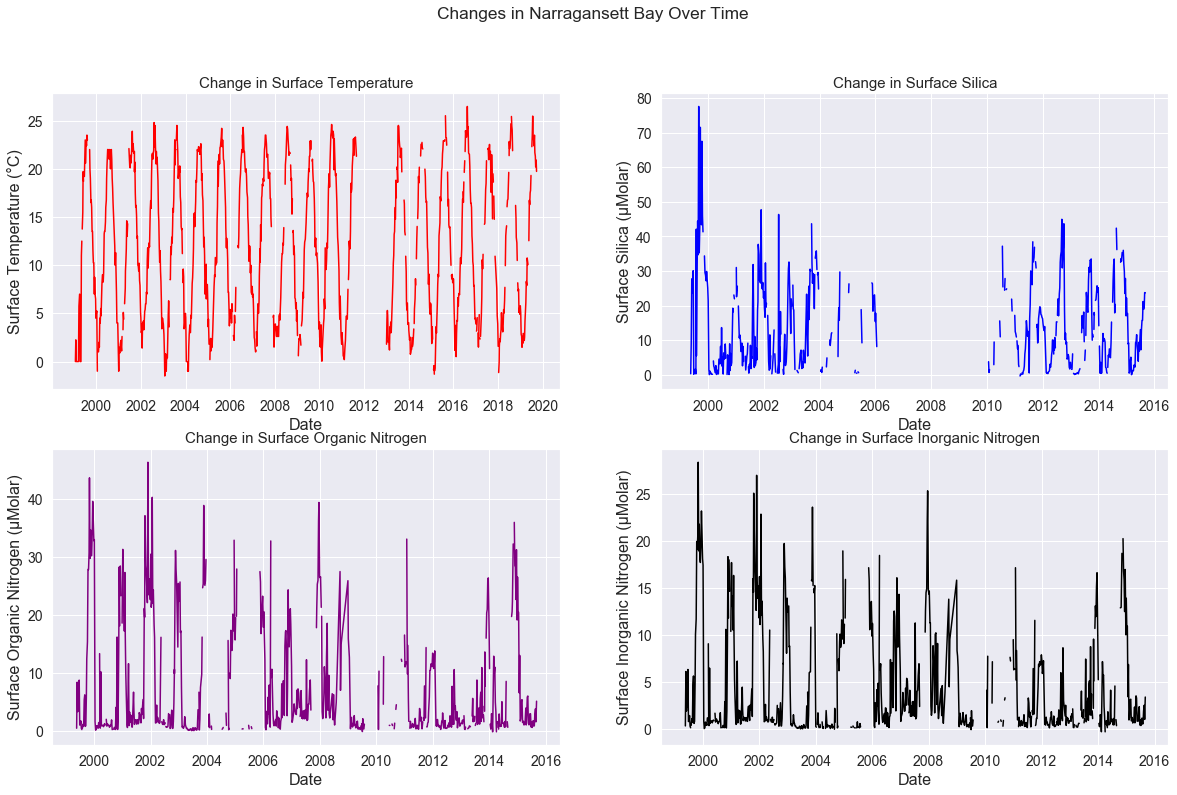

In [19]:
#plotting temperature and nutrients over time
fig, axs = plt.subplots(2, 2, figsize=(20,12))

#plotting temperature over time & setting titles/axis labels/tick frequency respectively
axs[0][0].plot('Date','temp', c='red', data=data)
axs[0][0].set_title('Change in Surface Temperature', loc="center", fontsize=15)
axs[0][0].set_xlabel('Date', fontsize=16)
axs[0][0].set_ylabel('Surface Temperature (°C)', fontsize=16)
axs[0][0].xaxis.set_major_locator(mdates.YearLocator(2))
axs[0][0].set_xticklabels(['1998','2000','2002','2004','2006','2008','2010','2012','2014','2016','2018','2020'])
axs[0][0].tick_params(axis='both', which='major', labelsize=14)

#plotting silica over time & setting titles/axis labels/tick frequency respectively
axs[0][1].plot('Date','Si', c='blue', data=data)
axs[0][1].set_title('Change in Surface Silica', loc="center", fontsize=15)
axs[0][1].set_xlabel('Date', fontsize=16)
axs[0][1].set_ylabel('Surface Silica (µMolar)', fontsize=16)
axs[0][1].xaxis.set_major_locator(mdates.YearLocator(2))
axs[0][1].set_xticklabels(['1998','2000','2002','2004','2006','2008','2010','2012','2014','2016','2018','2020'])
axs[0][1].tick_params(axis='both', which='major', labelsize=14)

#plotting organic nitrogen over time & setting titles/axis labels/tick frequency respectively
axs[1][0].plot('Date','OrgN', c='purple', data=data)
axs[1][0].set_title('Change in Surface Organic Nitrogen', loc="center", fontsize=15)
axs[1][0].set_xlabel('Date', fontsize=16)
axs[1][0].set_ylabel('Surface Organic Nitrogen (µMolar)', fontsize=16)
axs[1][0].xaxis.set_major_locator(mdates.YearLocator(2))
axs[1][0].set_xticklabels(['1998','2000','2002','2004','2006','2008','2010','2012','2014','2016','2018','2020'])
axs[1][0].tick_params(axis='both', which='major', labelsize=14)

#plotting inorganic nitrogen over time & setting titles/axis labels/tick frequency respectively
axs[1][1].plot('Date','DIN', c='black', data=data)
axs[1][1].set_title('Change in Surface Inorganic Nitrogen', loc="center", fontsize=15)
axs[1][1].set_xlabel('Date', fontsize=16)
axs[1][1].set_ylabel('Surface Inorganic Nitrogen (µMolar)', fontsize=16)
axs[1][1].xaxis.set_major_locator(mdates.YearLocator(2))
axs[1][1].set_xticklabels(['1998','2000','2002','2004','2006','2008','2010','2012','2014','2016','2018','2020'])
axs[1][1].tick_params(axis='both', which='major', labelsize=14)

plt.suptitle('Changes in Narragansett Bay Over Time', size='xx-large')

plt.show()

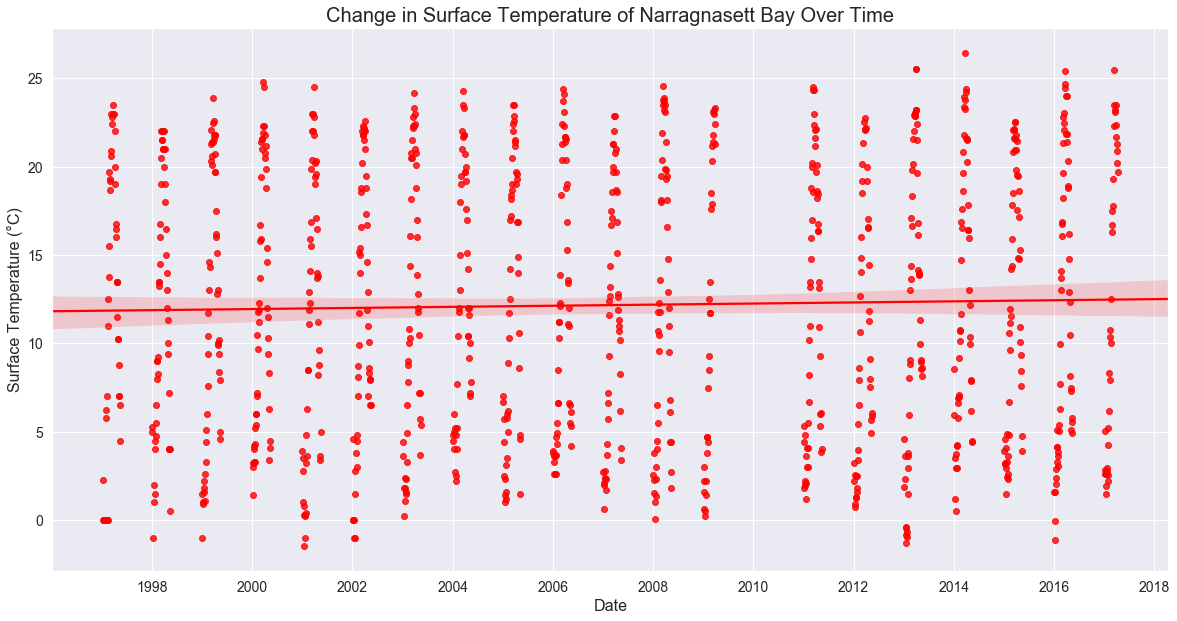

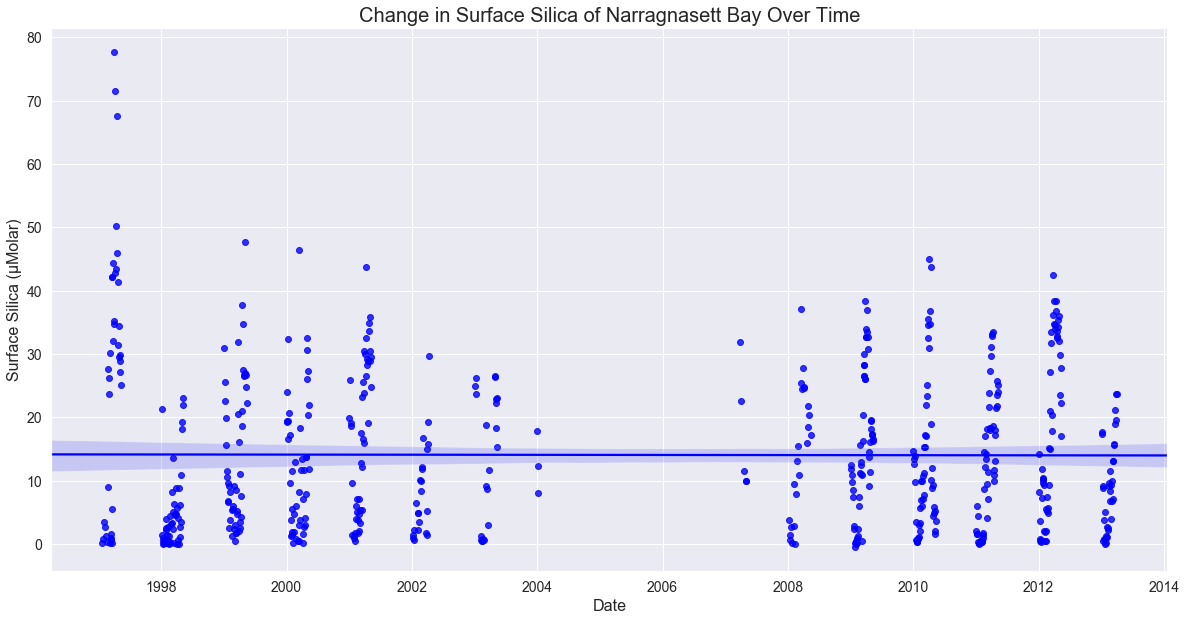

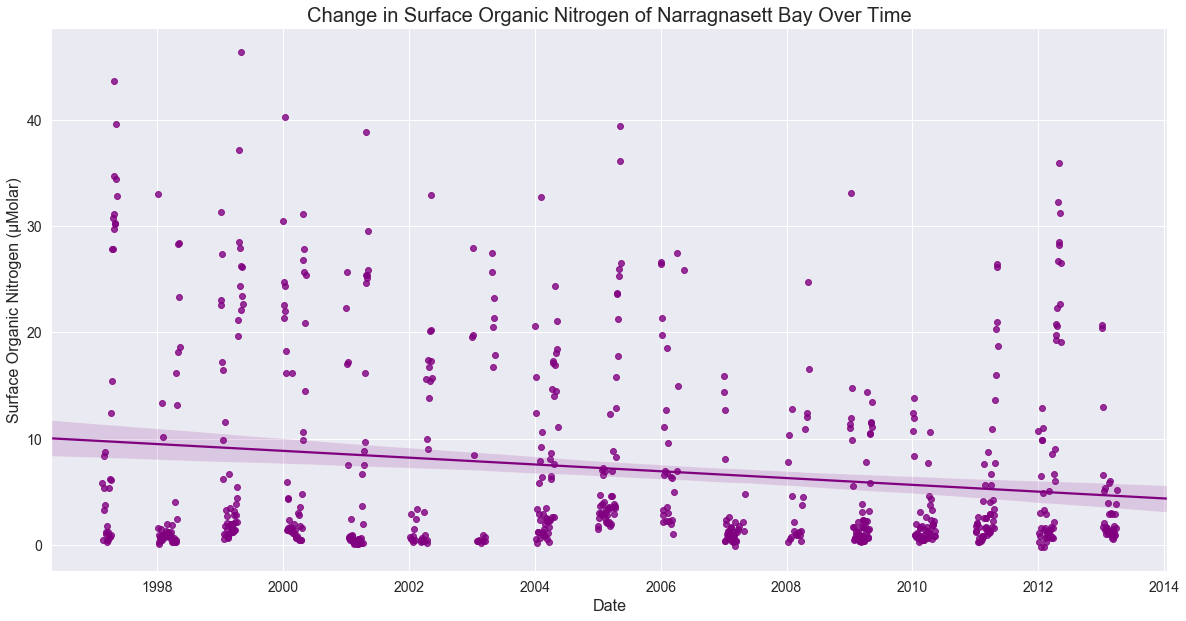

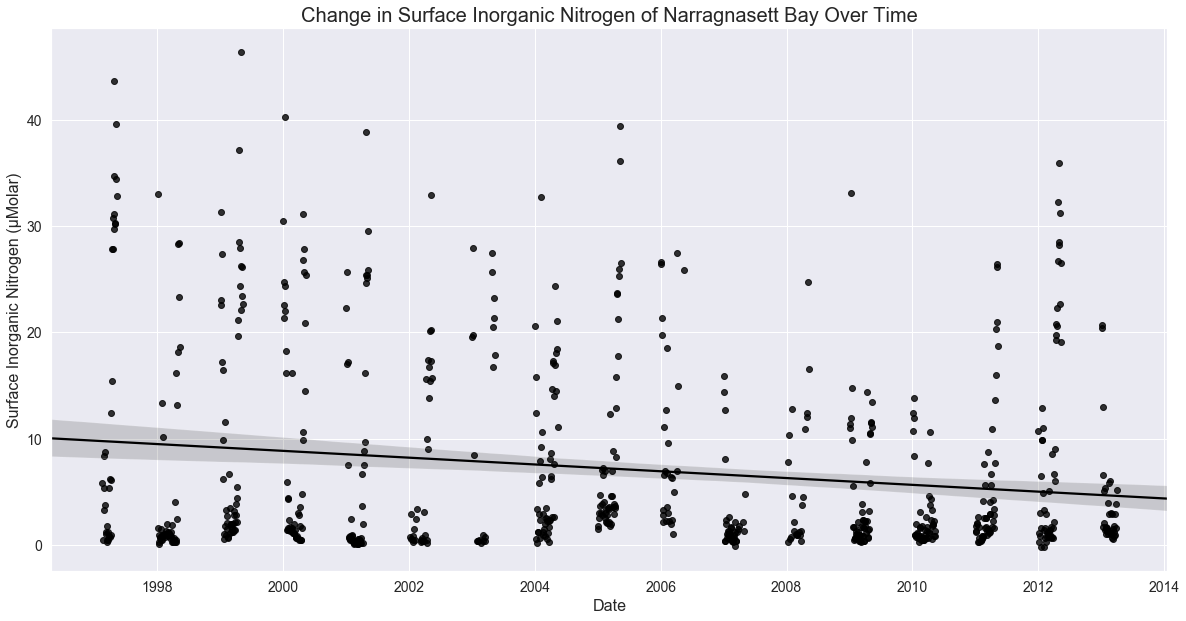

In [20]:
#plotting surface temperature over time with a trendline
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1) 
x5=data['jdate']
y5=data['temp']
sns.regplot(x5,y5, color='red')
#setting titles/axes
plt.title('Change in Surface Temperature of Narragnasett Bay Over Time', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Surface Temperature (°C)', fontsize=16)
#setting tick frequency, labels, and font size on axes
ax.xaxis.set_major_locator(ticker.MultipleLocator(2000))
ax.set_xticklabels(['1996','1998','2000','2002','2004','2006','2008','2010','2012','2014','2016','2018','2020'])
ax.tick_params(axis='both', which='major', labelsize=14)
plt.show()

#plotting surface silica over time with a trendline
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1) 
x6=data['jdate']
y6=data['Si']
sns.regplot(x6,y6, color='blue')
#setting titles/axes
plt.title('Change in Surface Silica of Narragnasett Bay Over Time', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Surface Silica (µMolar)', fontsize=16)
#setting tick frequency, labels, and font size on axes
ax.xaxis.set_major_locator(ticker.MultipleLocator(2000))
ax.set_xticklabels(['1996','1998','2000','2002','2004','2006','2008','2010','2012','2014','2016','2018','2020'])
ax.tick_params(axis='both', which='major', labelsize=14)
plt.show()

#plotting surface organic nitrogen over time with a trendline
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1) 
x7=data['jdate']
y7=data['OrgN']
sns.regplot(x7,y7, color='purple')
#setting titles/axes
plt.title('Change in Surface Organic Nitrogen of Narragnasett Bay Over Time', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Surface Organic Nitrogen (µMolar)', fontsize=16)
#setting tick frequency, labels, and font size on axes
ax.xaxis.set_major_locator(ticker.MultipleLocator(2000))
ax.set_xticklabels(['1996','1998','2000','2002','2004','2006','2008','2010','2012','2014','2016','2018','2020'])
ax.tick_params(axis='both', which='major', labelsize=14)
plt.show()

#plotting surface inorganic nitrogen over time with a trendline
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1) 
x8=data['jdate']
y8=data['OrgN']
sns.regplot(x8,y8, color='black')
#setting titles/axes
plt.title('Change in Surface Inorganic Nitrogen of Narragnasett Bay Over Time', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Surface Inorganic Nitrogen (µMolar)', fontsize=16)
#setting tick frequency, labels, and font size on axes
ax.xaxis.set_major_locator(ticker.MultipleLocator(2000))
ax.set_xticklabels(['1996','1998','2000','2002','2004','2006','2008','2010','2012','2014','2016','2018','2020'])
ax.tick_params(axis='both', which='major', labelsize=14)
plt.show()

Temperature is not significantly changing in the Bay over time. However, the trend line is at a slight positive angle suggesting that if more time is permitted, temperature may increase to a significant finding in the future.

Surface silica values are not significantly changing in the Bay. However, the variability has decresead in the recent years. In addition, the large data gap from 2004-2008 may have some effect on results. 

The effect time has on nitrogen could be due to the Clean Water Act of 1971. Active efforts to reduce pollution in Narragansett Bay began in the late early 90s and could be a reason why nitrogen has been declining in the Bay over the course of this dataset.

### Question 2) Is total phytoplankton abundance changing over time?

It was established that temperature and silica levels were not significantly changing in the Bay, but inorganic and organic nitrogen were. I am looking to see if these environmental factors change total phytoplankton abundance. 

In [21]:
#creating a linear model of total phytoplankton over time
x9 = sm.add_constant(data.jdate)
y9 = data.total_abund

#I skipped over any of the values that were missing
lm_abundvtime =sm.OLS(y9, x9, missing='drop').fit()

lm_abundvtime.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_abund   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7671
Date:                Fri, 20 Dec 2019   Prob (F-statistic):              0.381
Time:                        15:49:47   Log-Likelihood:                -17640.
No. Observations:                1030   AIC:                         3.528e+04
Df Residuals:                    1028   BIC:                         3.529e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.277e+07   6.81e+07      0.922      0.357   -7.08e+07    1.96e+08
jdate        -29.6833     33.892     -0.876      0.381     -96.188      36.821
==============================================================================
Omnibus:                     1593.768   Durbin-Watson:                   1.390
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           859499.989
Skew:                           9.068   Prob(JB):                         0.00
Kurtosis:                     143.351   Cond. No.                     6.61e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.61e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Total chlorophyll abundance can be used as a proxy for phytoplankton biomass. Samples are placed in a fluorometer to measure the reflectance of the sample called relative fluorescence units(RFU). RFUs can then be calculated to get an proxy estimate for the amount of biomass that is reflecting the light. 

In [22]:
#creating a linear model of total chla over time to see if time has a significant impact on phytoplankton abundance
x10 = sm.add_constant(data.jdate)
y10 = data.Chla

#I skipped over any of the values that were missing
lm_chlavtime =sm.OLS(y10, x10, missing='drop').fit()

lm_chlavtime.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Chla   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     5.183
Date:                Fri, 20 Dec 2019   Prob (F-statistic):             0.0230
Time:                        15:49:47   Log-Likelihood:                -3340.2
No. Observations:                1012   AIC:                             6684.
Df Residuals:                    1010   BIC:                             6694.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        161.5351     67.909      2.379      0.018      28.275     294.795
jdate      -7.695e-05   3.38e-05     -2.277      0.023      -0.000   -1.06e-05
==============================================================================
Omnibus:                      748.346   Durbin-Watson:                   1.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13004.887
Skew:                           3.269   Prob(JB):                         0.00
Kurtosis:                      19.300   Cond. No.                     6.61e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.61e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Total Phytoplankton Abudance over Time Model:**

Linear function: Total Phytoplankton Abundance(Date)= 6.277e+07 + -29.6833Date

Due to the p-value of 0.3813271 from the OLS linear regression, time does not significantly effect total phytoplankton abundance. However, this model does not fit the data well as the R squared value is 0.07%.

**Total Chlorophyll a over Time Model:**

Linear function: Chlorophylla(Date)= 161.5351 + -7.695e-05Date

Due to the p-value of 0.02302 from the OLS linear regression, time significantly effects total chlorophyll. However, this model does not fit the data well as the R squared value is 0.51%.

I find it very interesting that total phytoplankton abundance is not significantly effected by time but chlorophyll a levels are since chlorophyll a levels are a proxy for phytoplankton abundance. This could be due to the very sporadic and patchy distribution of large phytoplankton blooms. It is possible that the large phytoplankton abundances influenced the results. 

These models are visualized below with basic line plots and regression plots. 

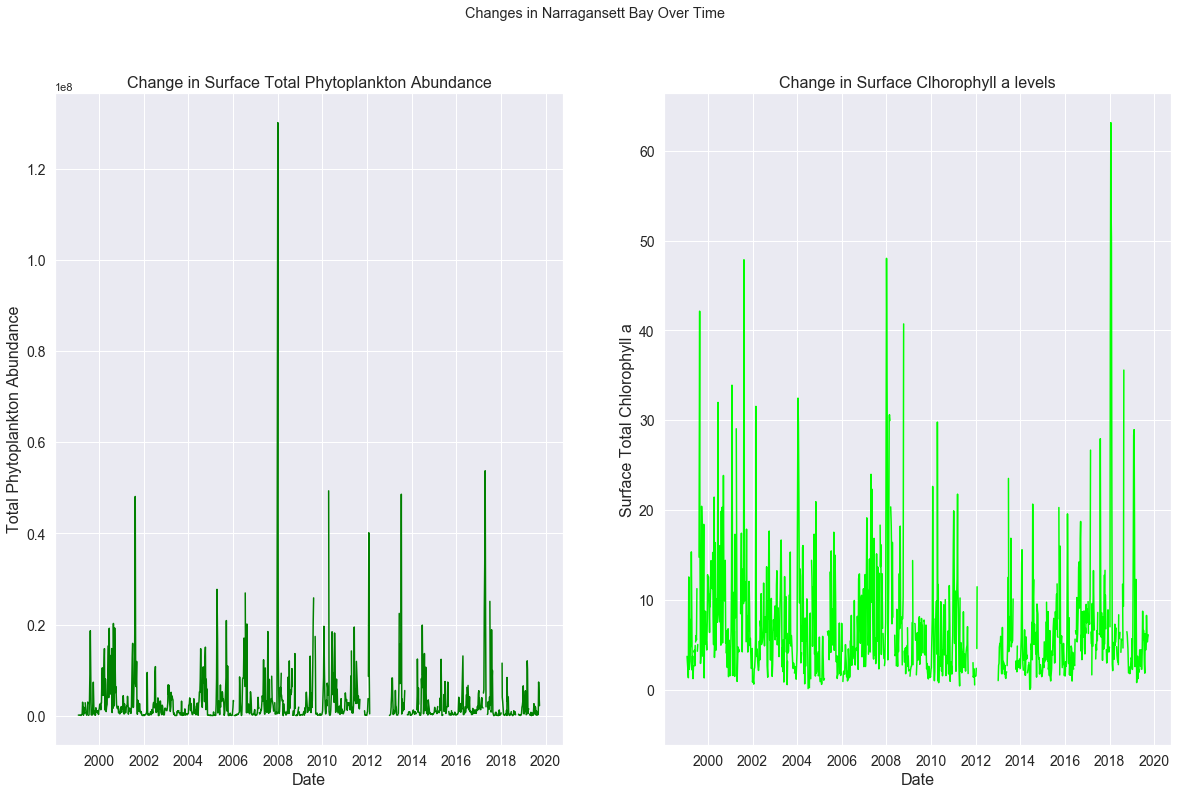

In [23]:
#plotting temperature and nutrients over time
fig, axs = plt.subplots(1,2, figsize=(20,12))

#plotting temperature over time & setting titles/axis labels/tick frequency respectively
axs[0].plot('Date','total_abund', c='green', data=data)
axs[0].set_title('Change in Surface Total Phytoplankton Abundance', loc="center", fontsize=16)
axs[0].set_xlabel('Date', fontsize=16)
axs[0].set_ylabel('Total Phytoplankton Abundance', fontsize=16)
axs[0].xaxis.set_major_locator(mdates.YearLocator(2))
axs[0].set_xticklabels(['1998','2000','2002','2004','2006','2008','2010','2012','2014','2016','2018','2020'])
axs[0].tick_params(axis='both', which='major', labelsize=14)

#plotting silica over time & setting titles/axis labels/tick frequency respectively
axs[1].plot('Date','Chla', c='lime', data=data)
axs[1].set_title('Change in Surface Clhorophyll a levels', loc="center", fontsize=16)
axs[1].set_xlabel('Date', fontsize=16)
axs[1].set_ylabel('Surface Total Chlorophyll a', fontsize=16)
axs[1].xaxis.set_major_locator(mdates.YearLocator(2))
axs[1].set_xticklabels(['1998','2000','2002','2004','2006','2008','2010','2012','2014','2016','2018','2020'])
axs[1].tick_params(axis='both', which='major', labelsize=14)

plt.suptitle('Changes in Narragansett Bay Over Time', size='x-large')

plt.show()

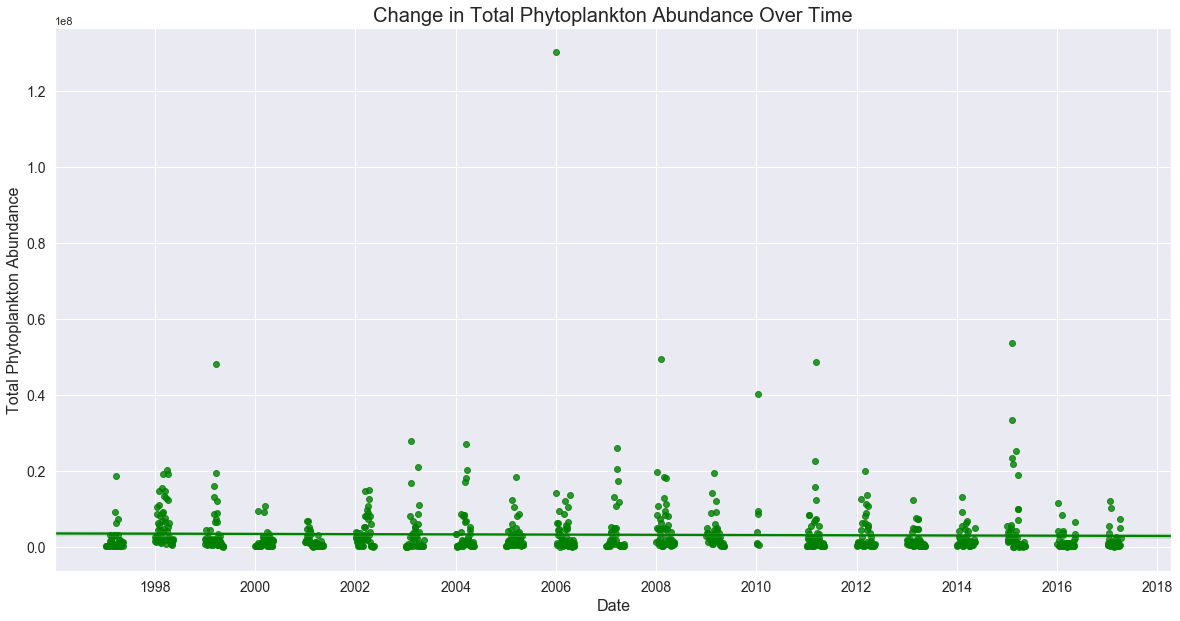

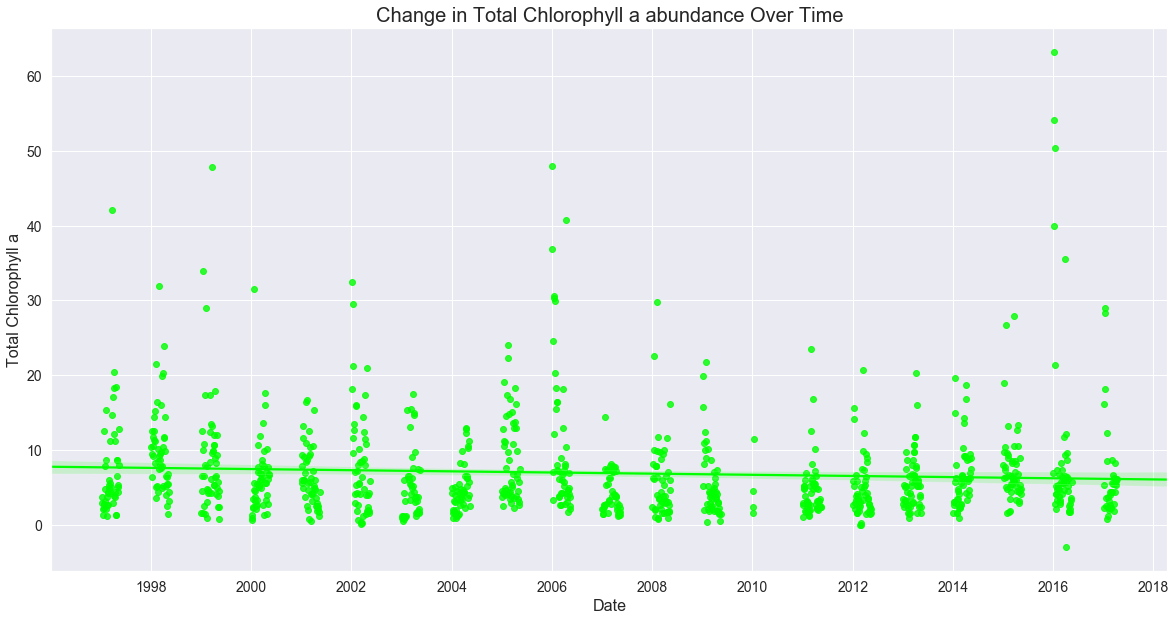

In [24]:
#plotting total abundance over time with a trendline
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
x11=data['jdate']
y11=data['total_abund']
sns.regplot(x11,y11, color='green')
#setting titles/axes
plt.title('Change in Total Phytoplankton Abundance Over Time', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Total Phytoplankton Abundance', fontsize=16)
#setting tick frequency, labels, and font size on axes
ax.xaxis.set_major_locator(ticker.MultipleLocator(2000))
ax.set_xticklabels(['1996','1998','2000','2002','2004','2006','2008','2010','2012','2014','2016','2018','2020'])
ax.tick_params(axis='both', which='major', labelsize=14)
plt.show()

#plotting total chlorophyll a over time with a trendline
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
x12=data['jdate']
y12=data['Chla']
sns.regplot(x12,y12, color='lime')
#setting titles/axes
plt.title('Change in Total Chlorophyll a abundance Over Time', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Total Chlorophyll a', fontsize=16)
#setting tick frequency, labels, and font size on axes
ax.xaxis.set_major_locator(ticker.MultipleLocator(2000))
ax.set_xticklabels(['1996','1998','2000','2002','2004','2006','2008','2010','2012','2014','2016','2018','2020'])
ax.tick_params(axis='both', which='major', labelsize=14)
plt.show()

For both total abundance and chlorophyll a levels, there are large spikes 2006 and 2016. It would be interesting to know if this this is contributed to nutrients or temperature or both.

### Question 3) Do any of the environmental factors have a significant impact on *Thalassiosira nordenskioeldii* abundance or the 2 HABs species: *Akashiwo sanguineum* or *Pseudonitzschia*? 

### *Thalassiosira nordenskioeldii* tests - large winter-spring bloom contributor

In [25]:
#creating a linear model of temperature by T_nordenskioeldii
x13 = sm.add_constant(data.temp)
y13 = data.T_norden

#I skipped over any of the values that were missing
lm_nordenvtemp =sm.OLS(y13, x13, missing='drop').fit()

lm_nordenvtemp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               T_norden   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     69.07
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           3.23e-16
Time:                        15:49:53   Log-Likelihood:                -13317.
No. Observations:                 959   AIC:                         2.664e+04
Df Residuals:                     957   BIC:                         2.665e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.72e+05   1.57e+04     10.957      0.000    1.41e+05    2.03e+05
temp       -9109.2698   1096.047     -8.311      0.000   -1.13e+04   -6958.337
==============================================================================
Omnibus:                     1257.498   Durbin-Watson:                   0.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           184347.747
Skew:                           7.001   Prob(JB):                         0.00
Kurtosis:                      69.464   Cond. No.                         26.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#creating a linear model of silica by T_nordenskioeldii
x14 = sm.add_constant(data.Si)
y14 = data.T_norden

#I skipped over any of the values that were missing
lm_nordenvSi =sm.OLS(y14, x14, missing='drop').fit()

lm_nordenvSi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               T_norden   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     22.86
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           2.27e-06
Time:                        15:49:53   Log-Likelihood:                -7152.2
No. Observations:                 525   AIC:                         1.431e+04
Df Residuals:                     523   BIC:                         1.432e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.075e+04    1.3e+04      6.990      0.000    6.52e+04    1.16e+05
Si         -3307.2972    691.696     -4.781      0.000   -4666.142   -1948.453
==============================================================================
Omnibus:                      619.534   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35122.751
Skew:                           5.808   Prob(JB):                         0.00
Kurtosis:                      41.350   Cond. No.                         28.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#creating a linear model of OrgN by T_nordenskioeldii
x15 = sm.add_constant(data.OrgN)
y15 = data.T_norden

#I skipped over any of the values that were missing
lm_nordenvOrgN =sm.OLS(y15, x15, missing='drop').fit()

lm_nordenvOrgN.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               T_norden   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     7.722
Date:                Fri, 20 Dec 2019   Prob (F-statistic):            0.00561
Time:                        15:49:53   Log-Likelihood:                -9269.8
No. Observations:                 678   AIC:                         1.854e+04
Df Residuals:                     676   BIC:                         1.855e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.156e+04   1.01e+04      6.107      0.000    4.18e+04    8.13e+04
OrgN       -2414.3027    868.834     -2.779      0.006   -4120.241    -708.364
==============================================================================
Omnibus:                      860.812   Durbin-Watson:                   0.788
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76655.233
Skew:                           6.608   Prob(JB):                         0.00
Kurtosis:                      53.387   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#creating a linear model of DIN by T_nordenskioeldii
x16 = sm.add_constant(data.DIN)
y16 = data.T_norden

#I skipped over any of the values that were missing
lm_nordenvDIN =sm.OLS(y16, x16, missing='drop').fit()

lm_nordenvDIN.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               T_norden   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     9.181
Date:                Fri, 20 Dec 2019   Prob (F-statistic):            0.00254
Time:                        15:49:53   Log-Likelihood:                -9652.3
No. Observations:                 697   AIC:                         1.931e+04
Df Residuals:                     695   BIC:                         1.932e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.457e+04    1.2e+04      6.222      0.000     5.1e+04    9.81e+04
DIN        -5239.6010   1729.245     -3.030      0.003   -8634.772   -1844.430
==============================================================================
Omnibus:                      913.151   Durbin-Watson:                   0.697
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           101239.356
Skew:                           6.915   Prob(JB):                         0.00
Kurtosis:                      60.400   Cond. No.                         8.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Thalassiosira nordenskioeldii Results**

**Total Thalassiosira nordenskioeldii abundance over Temperature Model:**

Linear function: Thalassiosira nordenskioeldii(Temperatrue)= 1.72e+05 + -9109.2698Temp

Due to the p-value of 0.0000 from the OLS linear regression, temperature significantly effects Thalassiosira nordenskioeldii abundance. However, this model does not fit the data well as the R squared value is 6.7%.

**Total Thalassiosira nordenskioeldii abundance over Silica Model:**

Linear function:Thalassiosira nordenskioeldii(Silica)= 	9.075e+04 + -3307.2972Silica

Due to the p-value of 0.000 from the OLS linear regression, silica significantly effects Thalassiosira nordenskioeldii abundance. However, this model does not fit the data well as the R squared value is 4.2%.

**Total Thalassiosira nordenskioeldii abundance over Organic Nitrogen Model:**

Linear function:Thalassiosira nordenskioeldii(OrgN)= 	6.156e+04 + -2414.3027OrgN

Due to the p-value of 0.006 from the OLS linear regression, OrgN significantly effects Thalassiosira nordenskioeldii abundance. However, this model does not fit the data well as the R squared value is 1.1%.

**Total Thalassiosira nordenskioeldii abundance over Inorganic Nitrogen Model:**

Linear function:Thalassiosira nordenskioeldii(DIN)= 	7.457e+04 + -5239.6010DIN

Due to the p-value of 0.003 from the OLS linear regression, inorganic nitrogen significantly effects Thalassiosira nordenskioeldii abundance. However, this model does not fit the data well as the R squared value is 1.1%.

I find it interesting that all of the environmental factors have a significant effect on the growth of Thalassiosira nordenskioeldii. I was only expecting silica and temperature to have a significant effect since those are the 2 major factors for the growth of diatoms. In addition, it shows that the winter spring bloom of Thalassiosira nordenskioeldii is effected by several different factors. If these factors change, it could have a large impact on the amount of food (Thalassiosira nordenskioeldii) available for the returning fish.

These models are visualized below with basic line plots and regression plots. 

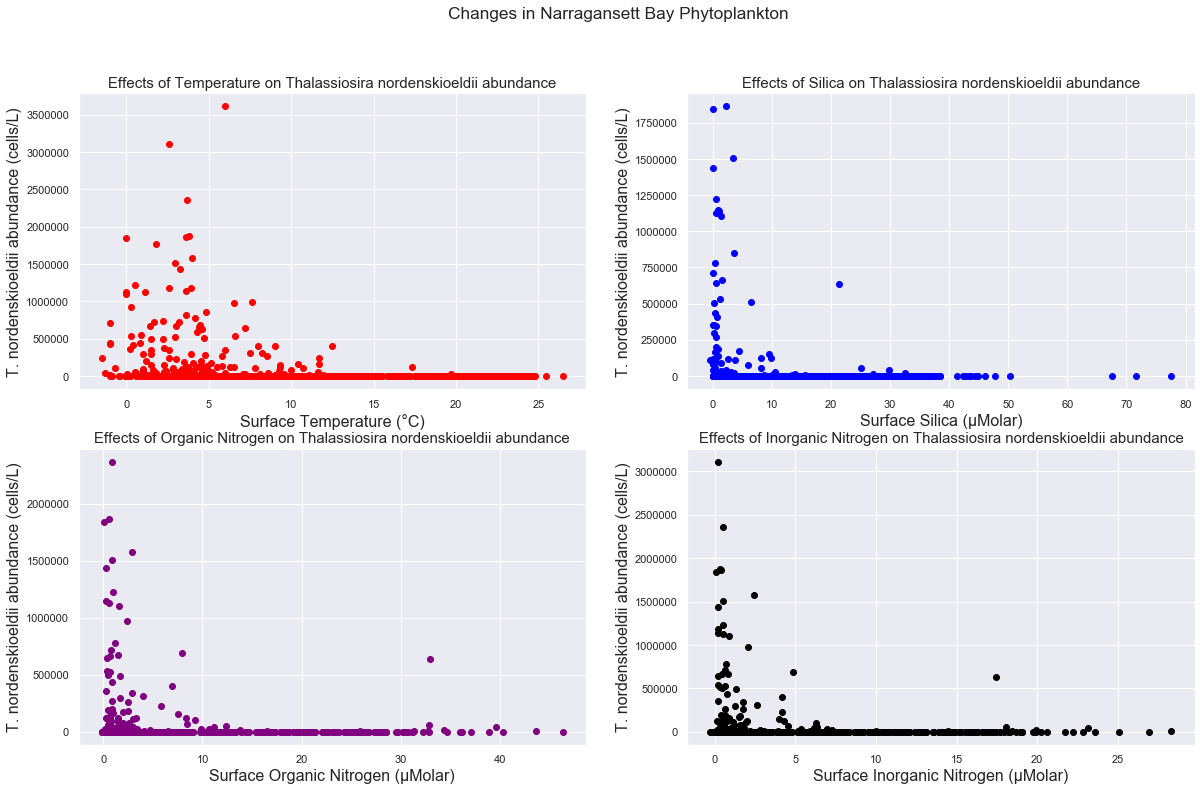

In [29]:
#plotting temperature and nutrients effects on Thalassiosira nordenskioeldii abundance
fig, axs = plt.subplots(2, 2, figsize=(20,12))

#plotting temperature over time & setting titles/axis labels/tick frequency respectively
axs[0][0].scatter('temp','T_norden', c='red', data=data)
axs[0][0].set_title('Effects of Temperature on Thalassiosira nordenskioeldii abundance', loc="center", fontsize=15)
axs[0][0].set_ylabel('T. nordenskioeldii abundance (cells/L)', fontsize=16)
axs[0][0].set_xlabel('Surface Temperature (°C)', fontsize=16)

#plotting silica over time & setting titles/axis labels/tick frequency respectively
axs[0][1].scatter('Si','T_norden', c='blue', data=data)
axs[0][1].set_title('Effects of Silica on Thalassiosira nordenskioeldii abundance', loc="center", fontsize=15)
axs[0][1].set_ylabel('T. nordenskioeldii abundance (cells/L)', fontsize=16)
axs[0][1].set_xlabel('Surface Silica (µMolar)', fontsize=16)

#plotting organic nitrogen over time & setting titles/axis labels/tick frequency respectively
axs[1][0].scatter('OrgN','T_norden', c='purple', data=data)
axs[1][0].set_title('Effects of Organic Nitrogen on Thalassiosira nordenskioeldii abundance', loc="center", fontsize=15)
axs[1][0].set_ylabel('T. nordenskioeldii abundance (cells/L)', fontsize=16)
axs[1][0].set_xlabel('Surface Organic Nitrogen (µMolar)', fontsize=16)


#plotting inorganic nitrogen over time & setting titles/axis labels/tick frequency respectively
axs[1][1].scatter('DIN','T_norden', c='black', data=data)
axs[1][1].set_title('Effects of Inorganic Nitrogen on Thalassiosira nordenskioeldii abundance', loc="center", fontsize=15)
axs[1][1].set_ylabel('T. nordenskioeldii abundance (cells/L)', fontsize=16)
axs[1][1].set_xlabel('Surface Inorganic Nitrogen (µMolar)', fontsize=16)


plt.suptitle('Changes in Narragansett Bay Phytoplankton', size='xx-large')

plt.show()

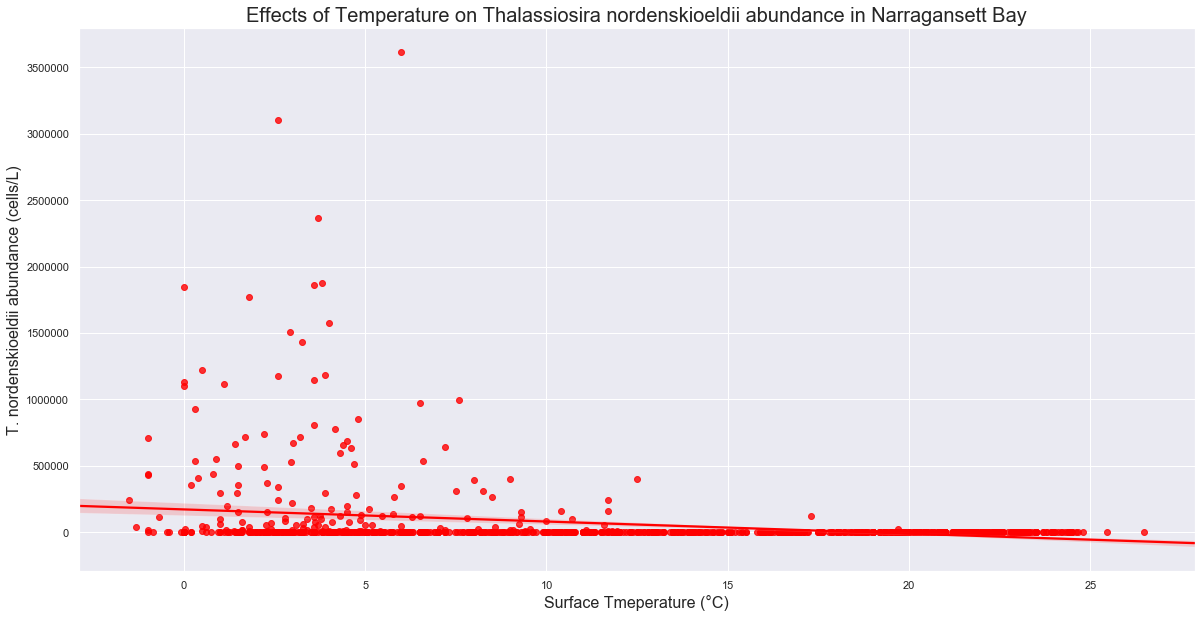

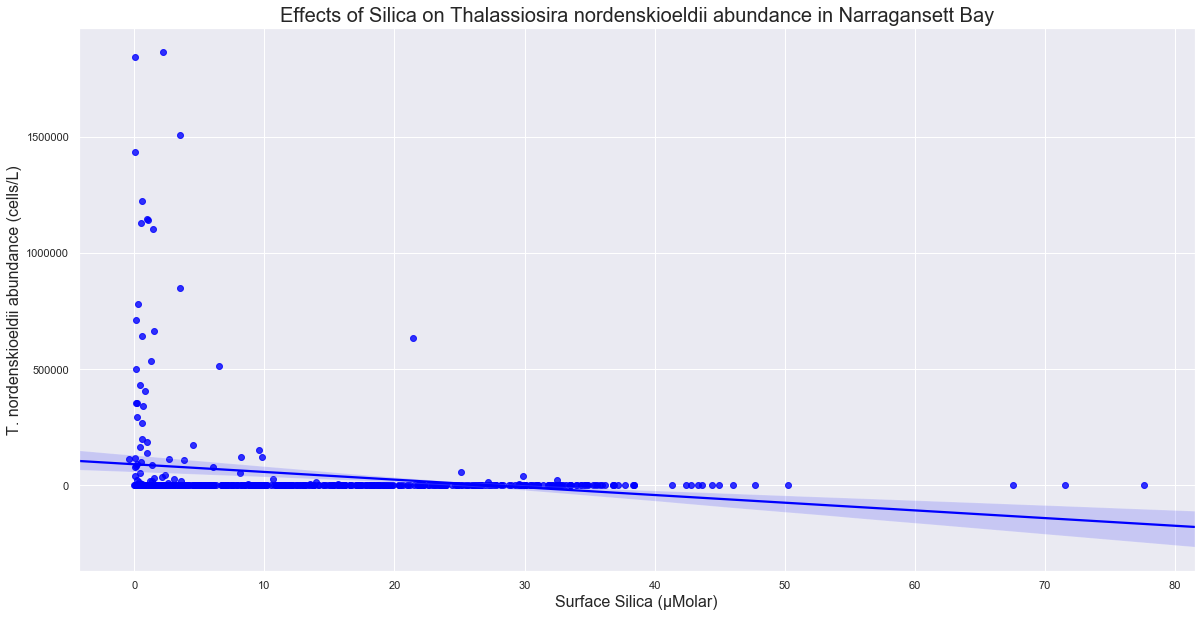

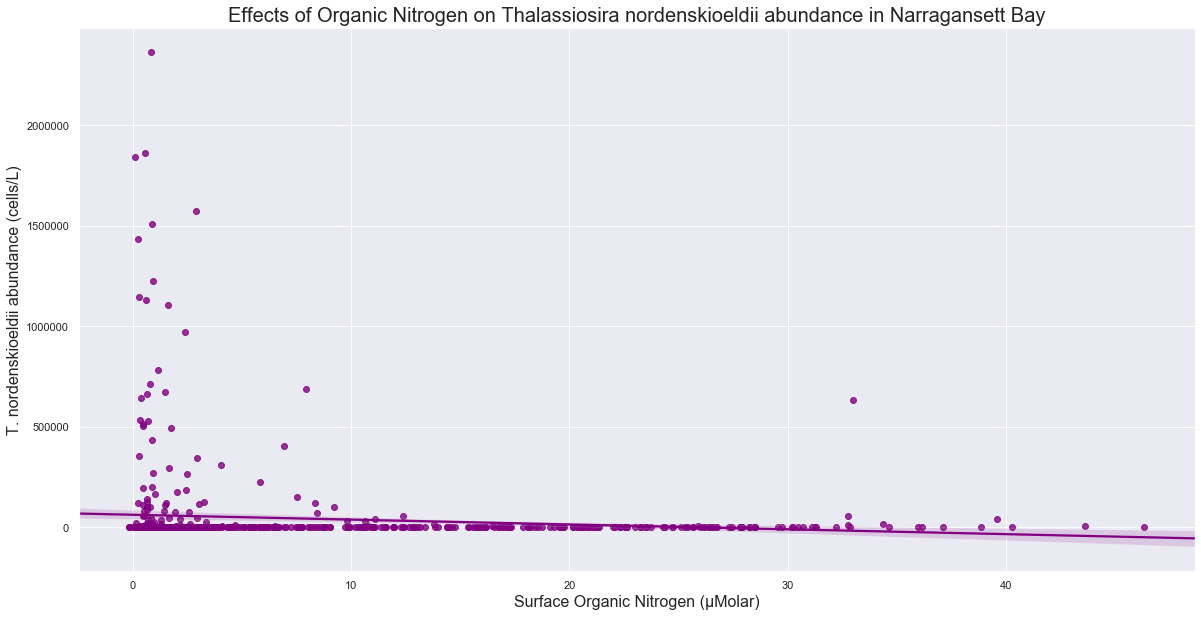

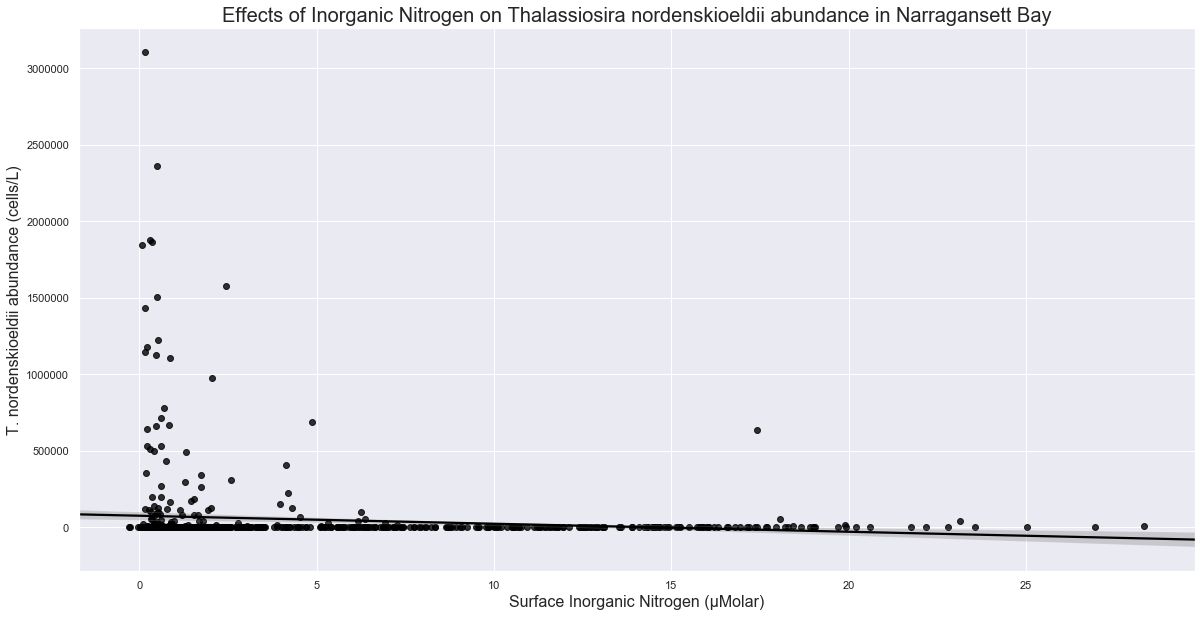

In [30]:
#plotting effect of temperature on T_nordenskioeldii
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
y25=data['T_norden']
x25=data['temp']
sns.regplot(x25,y25, color='red')
#setting titles/axes
plt.title('Effects of Temperature on Thalassiosira nordenskioeldii abundance in Narragansett Bay', fontsize=20)
plt.ylabel('T. nordenskioeldii abundance (cells/L)', fontsize=16)
plt.xlabel('Surface Tmeperature (°C)', fontsize=16)
plt.show()

#plotting effect of Silica on T_nordenskioeldii
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
y26=data['T_norden']
x26=data['Si']
sns.regplot(x26,y26, color='blue')
#setting titles/axes
plt.title('Effects of Silica on Thalassiosira nordenskioeldii abundance in Narragansett Bay', fontsize=20)
plt.ylabel('T. nordenskioeldii abundance (cells/L)', fontsize=16)
plt.xlabel('Surface Silica (µMolar)', fontsize=16)
plt.show()

#plotting effect of Organic Nitrogen on T_nordenskioeldii
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
y27=data['T_norden']
x27=data['OrgN']
sns.regplot(x27,y27, color='purple')
#setting titles/axes
plt.title('Effects of Organic Nitrogen on Thalassiosira nordenskioeldii abundance in Narragansett Bay', fontsize=20)
plt.ylabel('T. nordenskioeldii abundance (cells/L)', fontsize=16)
plt.xlabel('Surface Organic Nitrogen (µMolar)', fontsize=16)
plt.show()

#plotting effect of Inorganic Nitrogen on T_nordenskioeldii
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
y28=data['T_norden']
x28=data['DIN']
sns.regplot(x28,y28, color='black')
#setting titles/axes
plt.title('Effects of Inorganic Nitrogen on Thalassiosira nordenskioeldii abundance in Narragansett Bay', fontsize=20)
plt.ylabel('T. nordenskioeldii abundance (cells/L)', fontsize=16)
plt.xlabel('Surface Inorganic Nitrogen (µMolar)', fontsize=16)
plt.show()

### *Akashiwo sanguineum* tests

In [31]:
#creating a linear model of temperature by A_sang
x17 = sm.add_constant(data.temp)
y17 = data.A_sang

#I skipped over any of the values that were missing
lm_Asangvtemp =sm.OLS(y17, x17, missing='drop').fit()

lm_Asangvtemp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 A_sang   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     24.58
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           8.43e-07
Time:                        15:50:06   Log-Likelihood:                -8471.0
No. Observations:                 959   AIC:                         1.695e+04
Df Residuals:                     957   BIC:                         1.696e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -213.6815    100.274     -2.131      0.033    -410.464     -16.898
temp          34.7109      7.001      4.958      0.000      20.972      48.450
==============================================================================
Omnibus:                     1709.754   Durbin-Watson:                   0.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1220269.082
Skew:                          12.096   Prob(JB):                         0.00
Kurtosis:                     176.070   Cond. No.                         26.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#creating a linear model of silica by A_sang
x18 = sm.add_constant(data.Si)
y18 = data.A_sang

#I skipped over any of the values that were missing
lm_AsangvSi =sm.OLS(y18, x18, missing='drop').fit()

lm_AsangvSi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 A_sang   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     18.48
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           2.05e-05
Time:                        15:50:06   Log-Likelihood:                -4868.4
No. Observations:                 525   AIC:                             9741.
Df Residuals:                     523   BIC:                             9749.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -121.3274    167.568     -0.724      0.469    -450.516     207.861
Si            38.3753      8.928      4.298      0.000      20.837      55.914
==============================================================================
Omnibus:                      810.329   Durbin-Watson:                   1.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           175179.488
Skew:                           8.794   Prob(JB):                         0.00
Kurtosis:                      90.743   Cond. No.                         28.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#creating a linear model of OrgN by A_sang
x19 = sm.add_constant(data.OrgN)
y19 = data.A_sang

#I skipped over any of the values that were missing
lm_AsangvOrgN =sm.OLS(y19, x19, missing='drop').fit()

lm_AsangvOrgN.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 A_sang   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.088
Date:                Fri, 20 Dec 2019   Prob (F-statistic):              0.149
Time:                        15:50:07   Log-Likelihood:                -6218.7
No. Observations:                 678   AIC:                         1.244e+04
Df Residuals:                     676   BIC:                         1.245e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        432.3020    111.958      3.861      0.000     212.475     652.129
OrgN         -13.9450      9.650     -1.445      0.149     -32.893       5.003
==============================================================================
Omnibus:                     1110.003   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           374263.096
Skew:                          10.048   Prob(JB):                         0.00
Kurtosis:                     116.333   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
#creating a linear model of DIN by A_sang
x20 = sm.add_constant(data.DIN)
y20 = data.A_sang

#I skipped over any of the values that were missing
lm_AsangvDIN =sm.OLS(y20, x20, missing='drop').fit()

lm_AsangvDIN.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 A_sang   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.455
Date:                Fri, 20 Dec 2019   Prob (F-statistic):              0.228
Time:                        15:50:07   Log-Likelihood:                -6383.9
No. Observations:                 697   AIC:                         1.277e+04
Df Residuals:                     695   BIC:                         1.278e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        407.3315    110.172      3.697      0.000     191.022     623.641
DIN          -19.1752     15.898     -1.206      0.228     -50.389      12.038
==============================================================================
Omnibus:                     1148.740   Durbin-Watson:                   1.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           407612.253
Skew:                          10.198   Prob(JB):                         0.00
Kurtosis:                     119.702   Cond. No.                         8.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Total Akashiwo sanguineum abundance over Temperature Model:**

Linear function: Akashiwo sanguineum(Temperatrue)= -213.6815 + 34.7109Temp

Due to the p-value of 0.0000 from the OLS linear regression, temperature significantly effects Akashiwo sanguineum abundance. However, this model does not fit the data well as the R squared value is 2.5%.

**Total Akashiwo sanguineum abundance over Silica Model:**

Linear function:Akashiwo sanguineum(Silica)= 		-121.3274 + 38.3753Silica

Due to the p-value of 0.000 from the OLS linear regression, silica significantly effects Akashiwo sanguineum abundance. However, this model does not fit the data well as the R squared value is 3.4%.

**Total Akashiwo sanguineum abundance over Organic Nitrogen Model:**

Linear function:Akashiwo sanguineum(OrgN)= 	432.3020 + -13.9450OrgN

Due to the p-value of 0.149 from the OLS linear regression, OrgN does not significantly effect Akashiwo sanguineum abundance. However, this model does not fit the data well as the R squared value is 0.3%.

**Total Akashiwo sanguineum abundance over Inorganic Nitrogen Model:**

Linear function:Akashiwo sanguineum(DIN)= 	407.3315 + -19.1752DIN

Due to the p-value of 0.228 from the OLS linear regression, inorganic nitrogen does not significantly effect Akashiwo sanguineum abundance. However, this model does not fit the data well as the R squared value is 0.2%.

This is more of the results I would expect. Temperature and silica are the two significant findings that influence this diatom's growth. This is also very interesting in the prespective of climate change. Even if temperture has not been shown to significantly change in Narragansett Bay, there are several ocean basins that have shown significant rises in temperture. If temperature has an effect on this particular HAB species (as shown from the regression plot), it could have a serious impact on the smount of toxic diatoms in the water. 

These models are visualized below with basic line plots and regression plots. 

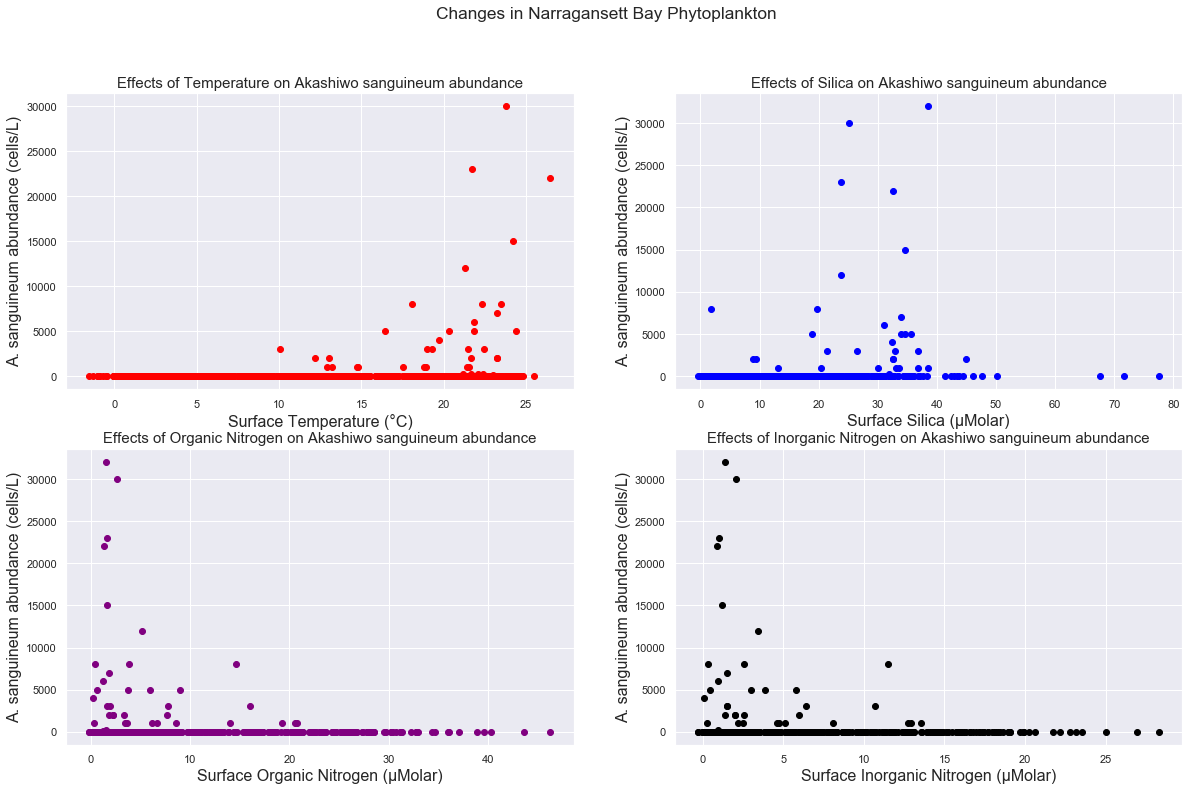

In [35]:
#plotting temperature and nutrients effects on Akashiwo sanguineum abundance
fig, axs = plt.subplots(2, 2, figsize=(20,12))

#plotting temperature over time & setting titles/axis labels/tick frequency respectively
axs[0][0].scatter('temp','A_sang', c='red', data=data)
axs[0][0].set_title('Effects of Temperature on Akashiwo sanguineum abundance', loc="center", fontsize=15)
axs[0][0].set_ylabel('A. sanguineum abundance (cells/L)', fontsize=16)
axs[0][0].set_xlabel('Surface Temperature (°C)', fontsize=16)

#plotting silica over time & setting titles/axis labels/tick frequency respectively
axs[0][1].scatter('Si','A_sang', c='blue', data=data)
axs[0][1].set_title('Effects of Silica on Akashiwo sanguineum abundance', loc="center", fontsize=15)
axs[0][1].set_ylabel('A. sanguineum abundance (cells/L)', fontsize=16)
axs[0][1].set_xlabel('Surface Silica (µMolar)', fontsize=16)

#plotting organic nitrogen over time & setting titles/axis labels/tick frequency respectively
axs[1][0].scatter('OrgN','A_sang', c='purple', data=data)
axs[1][0].set_title('Effects of Organic Nitrogen on Akashiwo sanguineum abundance', loc="center", fontsize=15)
axs[1][0].set_ylabel('A. sanguineum abundance (cells/L)', fontsize=16)
axs[1][0].set_xlabel('Surface Organic Nitrogen (µMolar)', fontsize=16)


#plotting inorganic nitrogen over time & setting titles/axis labels/tick frequency respectively
axs[1][1].scatter('DIN','A_sang', c='black', data=data)
axs[1][1].set_title('Effects of Inorganic Nitrogen on Akashiwo sanguineum abundance', loc="center", fontsize=15)
axs[1][1].set_ylabel('A. sanguineum abundance (cells/L)', fontsize=16)
axs[1][1].set_xlabel('Surface Inorganic Nitrogen (µMolar)', fontsize=16)


plt.suptitle('Changes in Narragansett Bay Phytoplankton', size='xx-large')

plt.show()

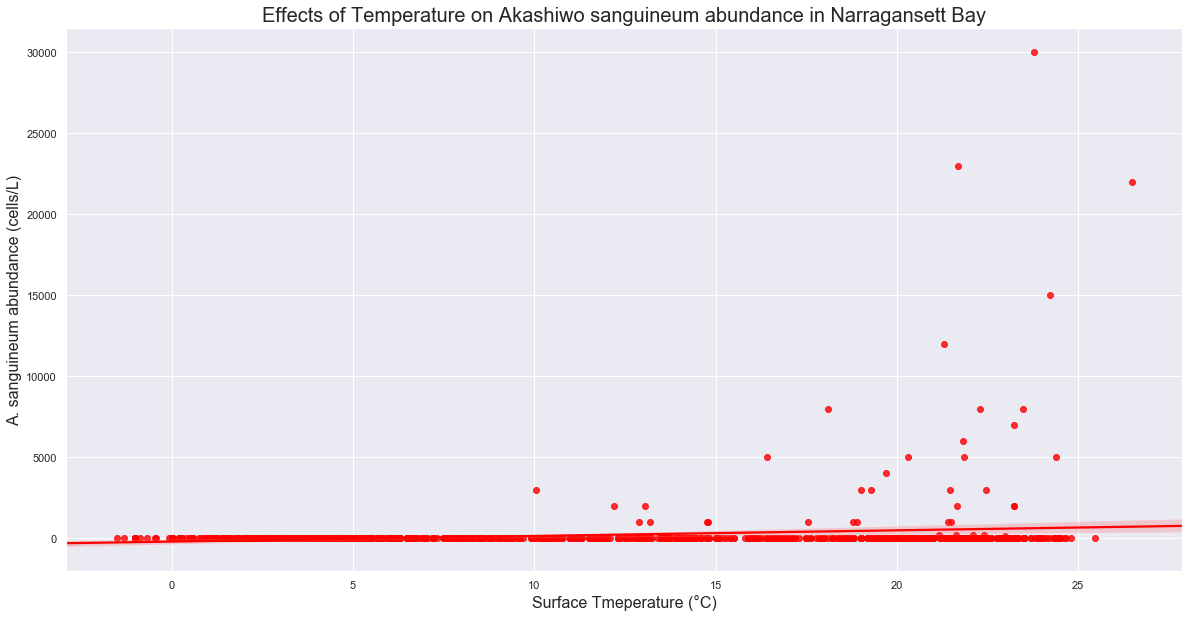

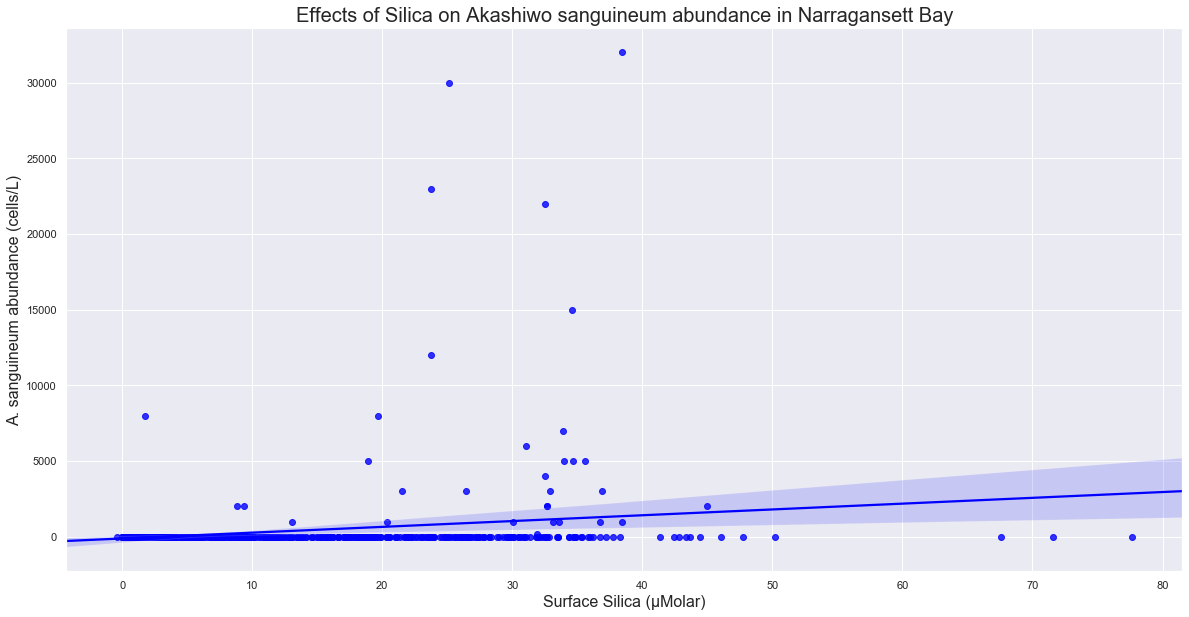

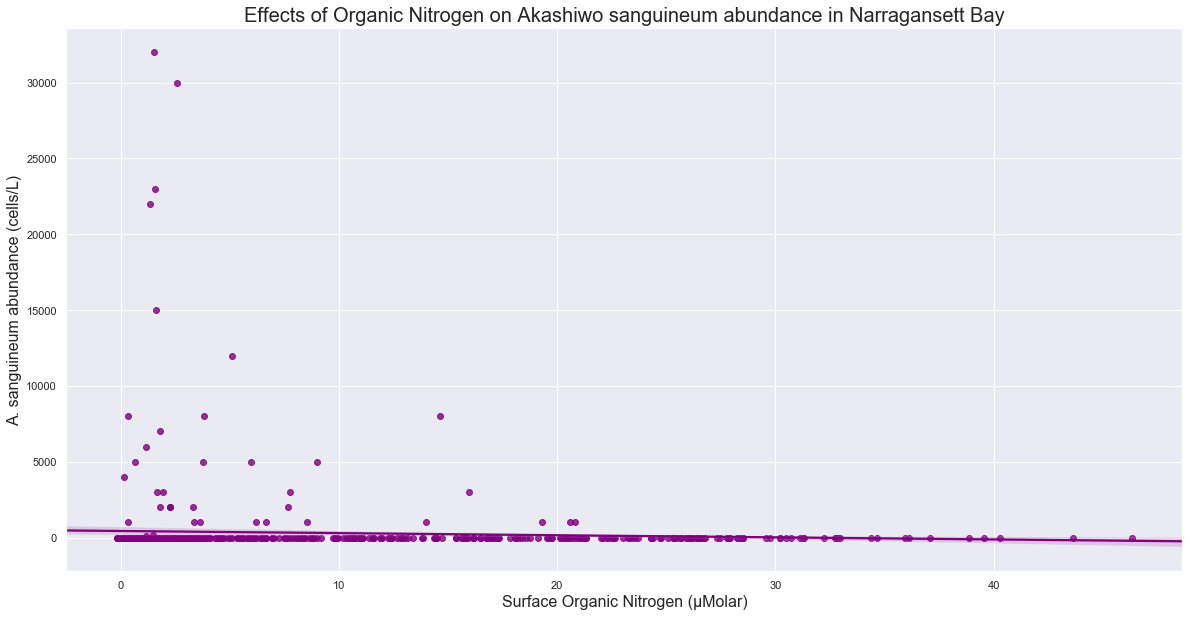

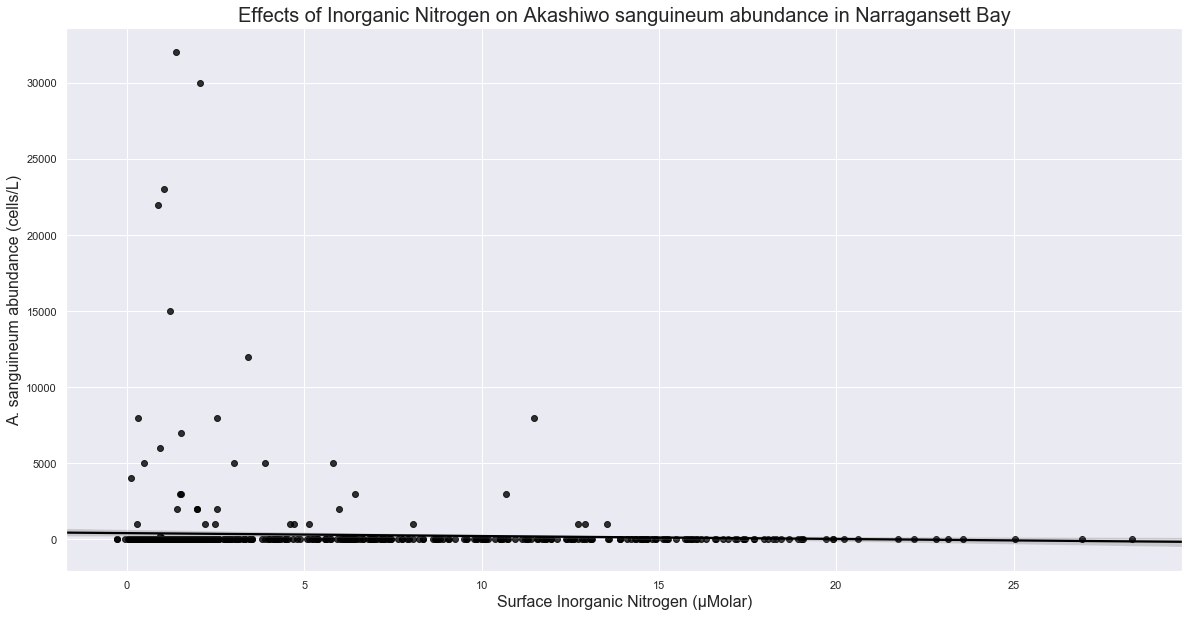

In [36]:
#plotting effect of temperature on Akashiwo sanguineum
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
y25=data['A_sang']
x25=data['temp']
sns.regplot(x25,y25, color='red')
#setting titles/axes
plt.title('Effects of Temperature on Akashiwo sanguineum abundance in Narragansett Bay', fontsize=20)
plt.ylabel('A. sanguineum abundance (cells/L)', fontsize=16)
plt.xlabel('Surface Tmeperature (°C)', fontsize=16)
plt.show()

#plotting effect of Silica on Akashiwo sanguineum
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
y26=data['A_sang']
x26=data['Si']
sns.regplot(x26,y26, color='blue')
#setting titles/axes
plt.title('Effects of Silica on Akashiwo sanguineum abundance in Narragansett Bay', fontsize=20)
plt.ylabel('A. sanguineum abundance (cells/L)', fontsize=16)
plt.xlabel('Surface Silica (µMolar)', fontsize=16)
plt.show()

#plotting effect of Organic Nitrogen on Akashiwo sanguineum
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
y27=data['A_sang']
x27=data['OrgN']
sns.regplot(x27,y27, color='purple')
#setting titles/axes
plt.title('Effects of Organic Nitrogen on Akashiwo sanguineum abundance in Narragansett Bay', fontsize=20)
plt.ylabel('A. sanguineum abundance (cells/L)', fontsize=16)
plt.xlabel('Surface Organic Nitrogen (µMolar)', fontsize=16)
plt.show()

#plotting effect of Inorganic Nitrogen on Akashiwo sanguineum
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
y28=data['A_sang']
x28=data['DIN']
sns.regplot(x28,y28, color='black')
#setting titles/axes
plt.title('Effects of Inorganic Nitrogen on Akashiwo sanguineum abundance in Narragansett Bay', fontsize=20)
plt.ylabel('A. sanguineum abundance (cells/L)', fontsize=16)
plt.xlabel('Surface Inorganic Nitrogen (µMolar)', fontsize=16)
plt.show()

### *Pseudonitzschia* tests

In [37]:
#creating a linear model of temperature by Pseudo
x21 = sm.add_constant(data.temp)
y21 = data.Pseudo

#I skipped over any of the values that were missing
lm_Pseudovtemp =sm.OLS(y21, x21, missing='drop').fit()

lm_Pseudovtemp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Pseudo   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.242
Date:                Fri, 20 Dec 2019   Prob (F-statistic):              0.265
Time:                        15:50:19   Log-Likelihood:                -9689.3
No. Observations:                 933   AIC:                         1.938e+04
Df Residuals:                     931   BIC:                         1.939e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.7104    477.155     -0.048      0.962    -959.135     913.714
temp          37.3425     33.501      1.115      0.265     -28.403     103.089
==============================================================================
Omnibus:                     2315.141   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         16577241.339
Skew:                          24.581   Prob(JB):                         0.00
Kurtosis:                     654.158   Cond. No.                         26.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#creating a linear model of silica by Pseudo
x22 = sm.add_constant(data.Si)
y22 = data.Pseudo

#I skipped over any of the values that were missing
lm_PseudovSi =sm.OLS(y22, x22, missing='drop').fit()

lm_PseudovSi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Pseudo   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7974
Date:                Fri, 20 Dec 2019   Prob (F-statistic):              0.372
Time:                        15:50:19   Log-Likelihood:                -5439.5
No. Observations:                 509   AIC:                         1.088e+04
Df Residuals:                     507   BIC:                         1.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1240.4689    697.825      1.778      0.076    -130.515    2611.453
Si           -33.1112     37.079     -0.893      0.372    -105.959      39.736
==============================================================================
Omnibus:                     1144.167   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2677567.426
Skew:                          18.132   Prob(JB):                         0.00
Kurtosis:                     356.462   Cond. No.                         28.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#creating a linear model of OrgN by Pseudo
x23 = sm.add_constant(data.OrgN)
y23 = data.Pseudo

#I skipped over any of the values that were missing
lm_PseudovOrgN =sm.OLS(y23, x23, missing='drop').fit()

lm_PseudovOrgN.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Pseudo   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5115
Date:                Fri, 20 Dec 2019   Prob (F-statistic):              0.475
Time:                        15:50:19   Log-Likelihood:                -7008.4
No. Observations:                 664   AIC:                         1.402e+04
Df Residuals:                     662   BIC:                         1.403e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        792.8508    452.059      1.754      0.080     -94.792    1680.494
OrgN         -27.9642     39.102     -0.715      0.475    -104.742      48.814
==============================================================================
Omnibus:                     1557.291   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5965024.398
Skew:                          20.733   Prob(JB):                         0.00
Kurtosis:                     465.476   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
#creating a linear model of DIN by Pseudo
x24 = sm.add_constant(data.DIN)
y24 = data.Pseudo

#I skipped over any of the values that were missing
lm_PseudovDIN =sm.OLS(y24, x24, missing='drop').fit()

lm_PseudovDIN.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Pseudo   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4714
Date:                Fri, 20 Dec 2019   Prob (F-statistic):              0.493
Time:                        15:50:19   Log-Likelihood:                -7098.9
No. Observations:                 673   AIC:                         1.420e+04
Df Residuals:                     671   BIC:                         1.421e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        782.1253    452.753      1.727      0.085    -106.858    1671.108
DIN          -44.7160     65.131     -0.687      0.493    -172.602      83.170
==============================================================================
Omnibus:                     1581.969   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6214322.229
Skew:                          20.876   Prob(JB):                         0.00
Kurtosis:                     471.900   Cond. No.                         8.91
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Total Pseudonitzschia abundance over Temperature Model:**

Linear function: Pseudonitzschia(Temperatrue)= 	-22.7104 + 37.3425Temp

Due to the p-value of 0.265 from the OLS linear regression, temperature does not significantly effect Pseudonitzschia abundance. However, this model does not fit the data well as the R squared value is 0.1%.

**Total Pseudonitzschia abundance over Silica Model:**

Linear function:Pseudonitzschia(Silica)= 	1240.4689 + -33.1112Silica

Due to the p-value of 0.372 from the OLS linear regression, silica does not significantly effects Pseudonitzschia abundance. However, this model does not fit the data well as the R squared value is 0.02%.

**Total Pseudonitzschia abundance over Organic Nitrogen Model:**

Linear function:Pseudonitzschia(OrgN)= 792.8508 + -27.9642OrgN

Due to the p-value of 0.475 from the OLS linear regression, OrgN does not significantly effect Pseudonitzschia abundance. However, this model does not fit the data well as the R squared value is 0.3%.

**Total Pseudonitzschia abundance over Inorganic Nitrogen Model:**

Linear function:Pseudonitzschia(DIN)= 		782.1253 + -44.7160DIN

Due to the p-value of 0.493 from the OLS linear regression, inorganic nitrogen does not significantly effects Pseudonitzschia abundance. However, this model does not fit the data well as the R squared value is 0.01%.

This is surprising as it suggests there are other factos that effect this HAB species—this could potentially include phosphate, iron, or population density (all data I do not have access to with this dataset). It shows that not all HAB species are dependent on the same environmental factors and as climates alter, different species will be effected differently. 

These models are visualized below with basic line plots and regression plots. 

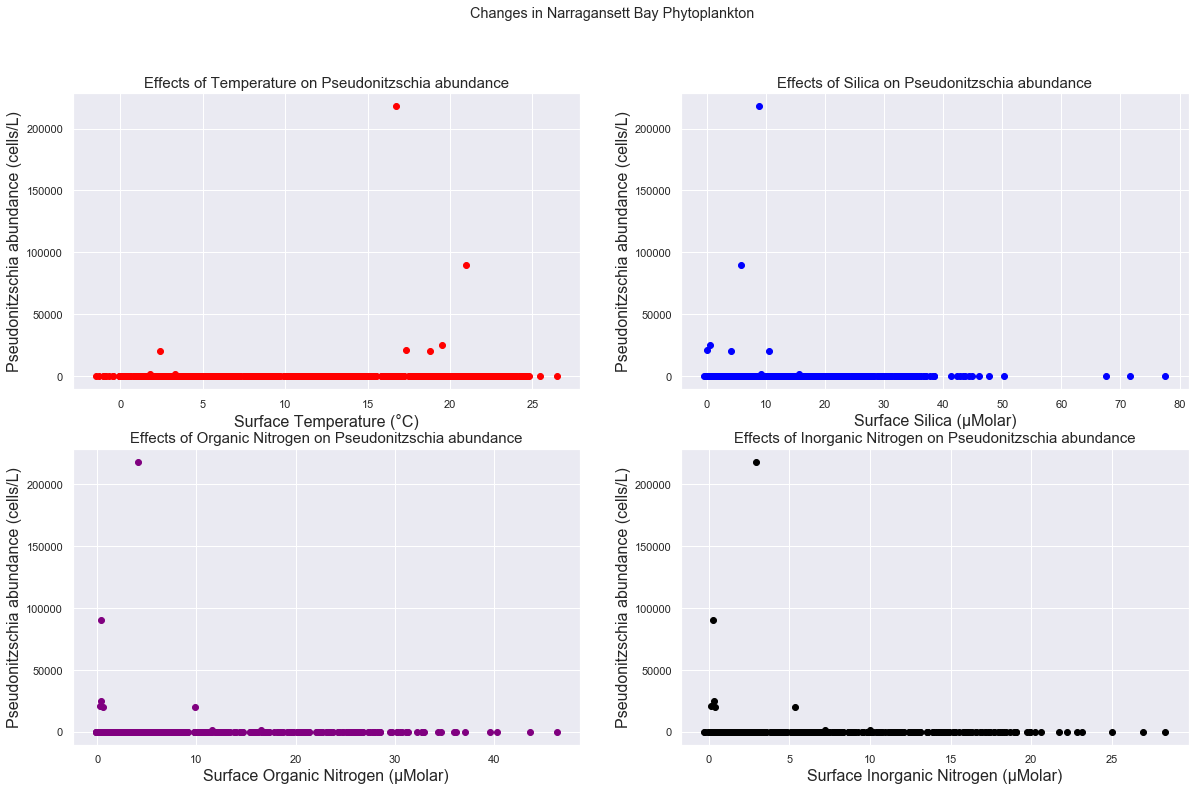

In [41]:
#plotting temperature and nutrients effects on Pseudonitzschia abundance
fig, axs = plt.subplots(2, 2, figsize=(20,12))

#plotting temperature over time & setting titles/axis labels/tick frequency respectively
axs[0][0].scatter('temp','Pseudo', c='red', data=data)
axs[0][0].set_title('Effects of Temperature on Pseudonitzschia abundance', loc="center", fontsize=15)
axs[0][0].set_ylabel('Pseudonitzschia abundance (cells/L)', fontsize=16)
axs[0][0].set_xlabel('Surface Temperature (°C)', fontsize=16)

#plotting silica over time & setting titles/axis labels/tick frequency respectively
axs[0][1].scatter('Si','Pseudo', c='blue', data=data)
axs[0][1].set_title('Effects of Silica on Pseudonitzschia abundance', loc="center", fontsize=15)
axs[0][1].set_ylabel('Pseudonitzschia abundance (cells/L)', fontsize=16)
axs[0][1].set_xlabel('Surface Silica (µMolar)', fontsize=16)

#plotting organic nitrogen over time & setting titles/axis labels/tick frequency respectively
axs[1][0].scatter('OrgN','Pseudo', c='purple', data=data)
axs[1][0].set_title('Effects of Organic Nitrogen on Pseudonitzschia abundance', loc="center", fontsize=15)
axs[1][0].set_ylabel('Pseudonitzschia abundance (cells/L)', fontsize=16)
axs[1][0].set_xlabel('Surface Organic Nitrogen (µMolar)', fontsize=16)


#plotting inorganic nitrogen over time & setting titles/axis labels/tick frequency respectively
axs[1][1].scatter('DIN','Pseudo', c='black', data=data)
axs[1][1].set_title('Effects of Inorganic Nitrogen on Pseudonitzschia abundance', loc="center", fontsize=15)
axs[1][1].set_ylabel('Pseudonitzschia abundance (cells/L)', fontsize=16)
axs[1][1].set_xlabel('Surface Inorganic Nitrogen (µMolar)', fontsize=16)


plt.suptitle('Changes in Narragansett Bay Phytoplankton', size='x-large')

plt.show()

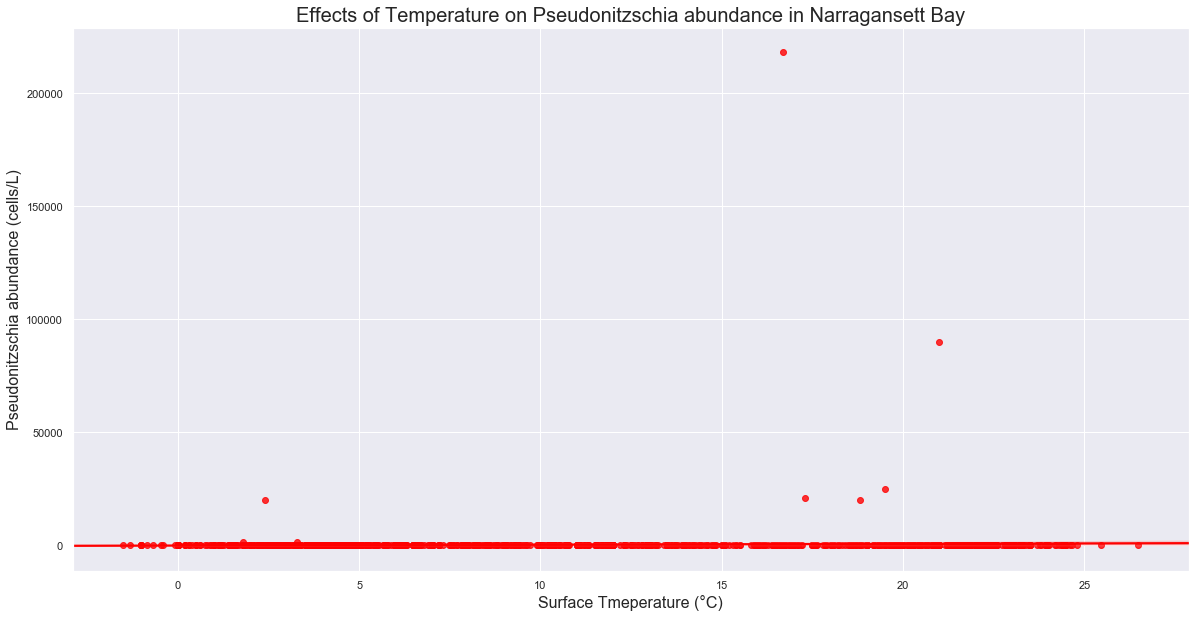

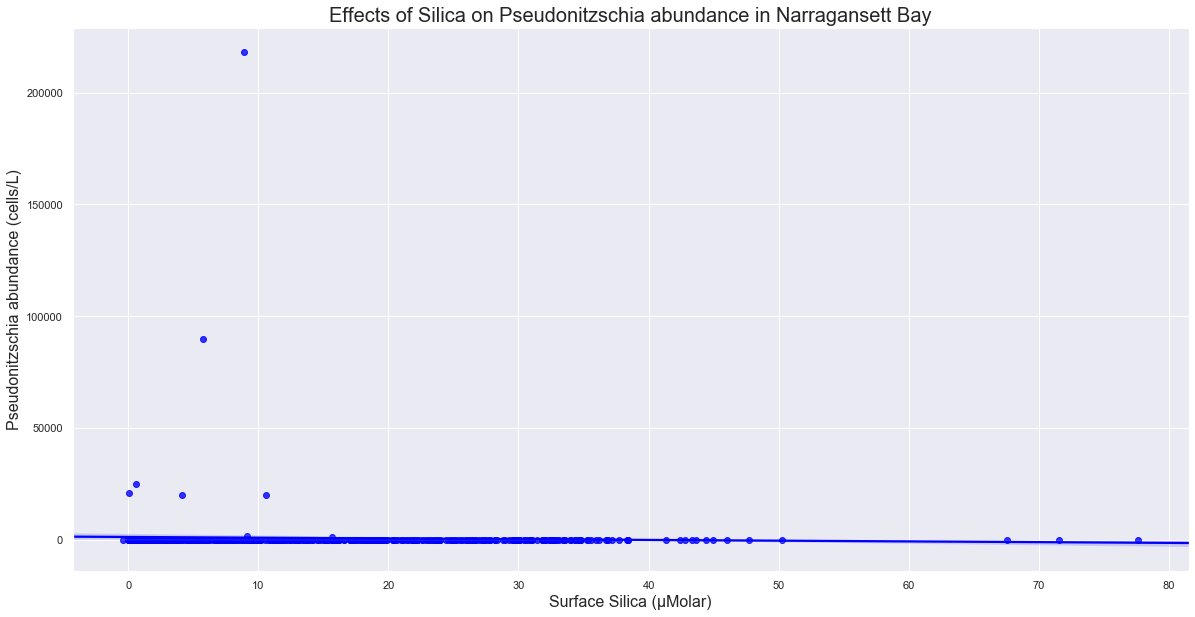

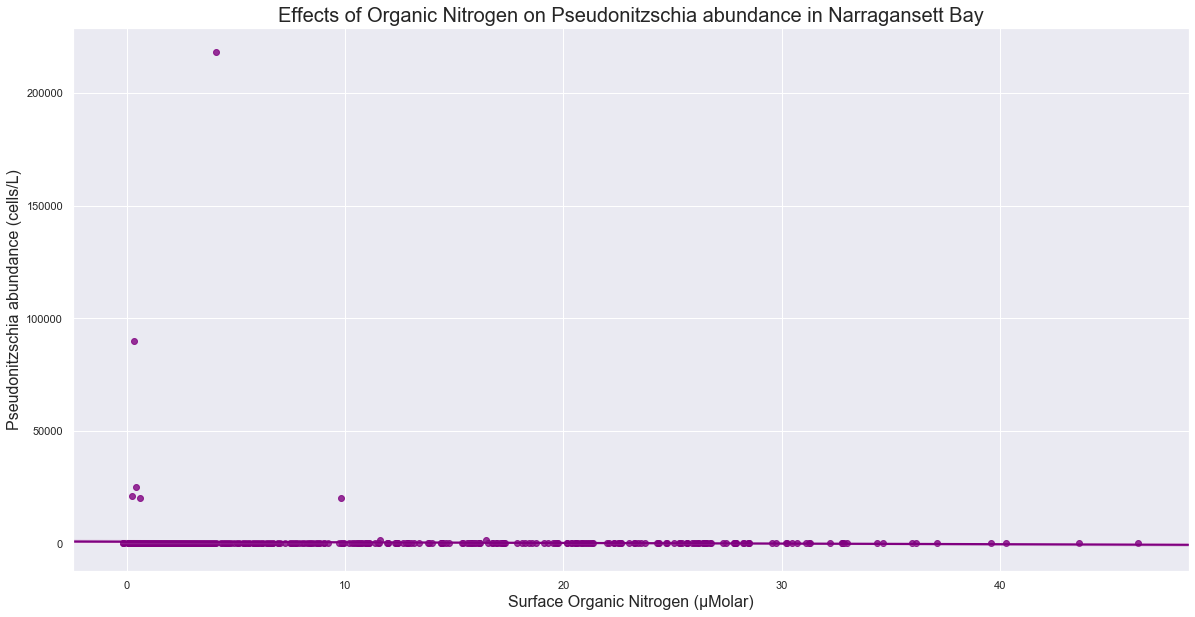

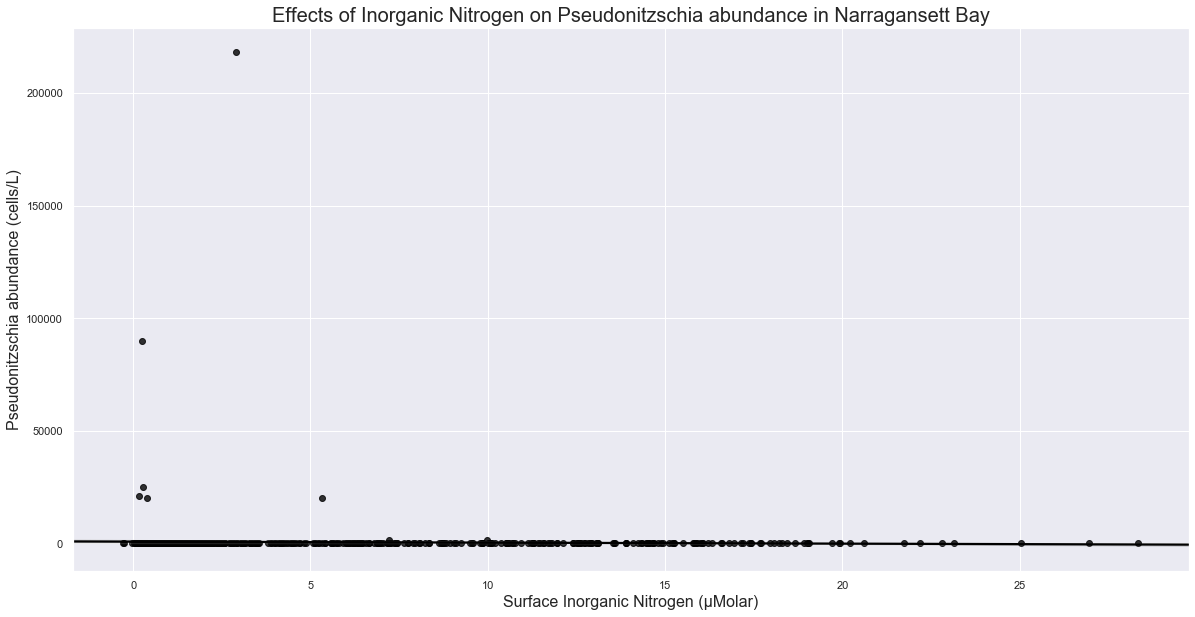

In [42]:
#plotting effect of temperature on Pseudonitzschia
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
y25=data['Pseudo']
x25=data['temp']
sns.regplot(x25,y25, color='red')
#setting titles/axes
plt.title('Effects of Temperature on Pseudonitzschia abundance in Narragansett Bay', fontsize=20)
plt.ylabel('Pseudonitzschia abundance (cells/L)', fontsize=16)
plt.xlabel('Surface Tmeperature (°C)', fontsize=16)
plt.show()

#plotting effect of Silica on Pseudonitzschia
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
y26=data['Pseudo']
x26=data['Si']
sns.regplot(x26,y26, color='blue')
#setting titles/axes
plt.title('Effects of Silica on Pseudonitzschia abundance in Narragansett Bay', fontsize=20)
plt.ylabel('Pseudonitzschia abundance (cells/L)', fontsize=16)
plt.xlabel('Surface Silica (µMolar)', fontsize=16)
plt.show()

#plotting effect of Organic Nitrogen on Pseudonitzschia
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
y27=data['Pseudo']
x27=data['OrgN']
sns.regplot(x27,y27, color='purple')
#setting titles/axes
plt.title('Effects of Organic Nitrogen on Pseudonitzschia abundance in Narragansett Bay', fontsize=20)
plt.ylabel('Pseudonitzschia abundance (cells/L)', fontsize=16)
plt.xlabel('Surface Organic Nitrogen (µMolar)', fontsize=16)
plt.show()

#plotting effect of Inorganic Nitrogen on Pseudonitzschia
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
y28=data['Pseudo']
x28=data['DIN']
sns.regplot(x28,y28, color='black')
#setting titles/axes
plt.title('Effects of Inorganic Nitrogen on Pseudonitzschia abundance in Narragansett Bay', fontsize=20)
plt.ylabel('Pseudonitzschia abundance (cells/L)', fontsize=16)
plt.xlabel('Surface Inorganic Nitrogen (µMolar)', fontsize=16)
plt.show()

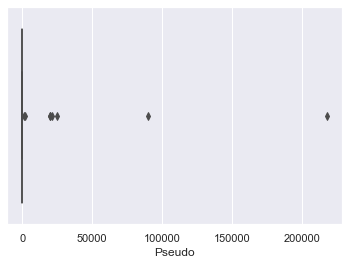

In [43]:
#crude test for outliers
sns.boxplot(x=data['Pseudo'])
plt.show()

It seems that there are several outliers that may be influencing the Pseudonitzchia abundance vs environmental conditions plots and may not be producing good results. 

In addition, almost all of the R2 values for these models were extremely low suggesting that a different model is needed to correctly account for and predict this data in the future. 